#***Enhancing Customer Segmentation for Improved Marketing Strategies on Swiggy***

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np

In [ ]:
# Load the Swiggy dataset
df = pd.read_csv('/content/drive/MyDrive/swiggy.csv')

## Data Dictionary
*  id - Every restaurant is having a unique ID
*  name - Name of the Restaurant
*  city - The city where the restaurant is located
*  rating - Rating of the Restaurant
*  rating_count - Number of People given the Rating
*  cost - Cost for two of eating in that restaurant
*  cuisine - Cuisines that restaurant serves
*  lic_no - License number of that restaurant
*  link - Restaurant link on Swiggy website
*  address - Full address of the restaurant


In [ ]:
df.head(10)

id                       name    city rating     rating_count   cost  \
0  567335             AB FOODS POINT  Abohar     --  Too Few Ratings  ₹ 200   
1  531342          Janta Sweet House  Abohar    4.4      50+ ratings  ₹ 200   
2  158203          theka coffee desi  Abohar    3.8     100+ ratings  ₹ 100   
3  187912                  Singh Hut  Abohar    3.7      20+ ratings  ₹ 250   
4  543530              GRILL MASTERS  Abohar     --  Too Few Ratings  ₹ 250   
5  158204                  Sam Uncle  Abohar    3.6      20+ ratings  ₹ 200   
6  156588           shere punjab veg  Abohar    4.0     100+ ratings  ₹ 150   
7  244866  Shri Balaji Vaishno Dhaba  Abohar     --  Too Few Ratings  ₹ 100   
8  156602   Hinglaj Kachori Bhandhar  Abohar    4.2      20+ ratings  ₹ 100   
9  158193                  yummy hub  Abohar     --  Too Few Ratings  ₹ 200   

                      cuisine          lic_no  \
0            Beverages,Pizzas  22122652000138   
1               Sweets,Bakery  12117201000112   
2                   Beverages  22121652000190   
3            Fast Food,Indian  22119652000167   
4  Italian-American,Fast Food  12122201000053   
5                 Continental  22119652000052   
6                North Indian  22120652000021   
7                North Indian  22119652000389   
8                Snacks,Chaat  22119652000042   
9                      Indian  22119652000045   

                                                link  \
0  https://www.swiggy.com/restaurants/ab-foods-po...   
1  https://www.swiggy.com/restaurants/janta-sweet...   
2  https://www.swiggy.com/restaurants/theka-coffe...   
3  https://www.swiggy.com/restaurants/singh-hut-n...   
4  https://www.swiggy.com/restaurants/grill-maste...   
5  https://www.swiggy.com/restaurants/sam-uncle-c...   
6  https://www.swiggy.com/restaurants/shere-punja...   
7  https://www.swiggy.com/restaurants/shri-balaji...   
8  https://www.swiggy.com/restaurants/hinglaj-kac...   
9  https://www.swiggy.com/restaurants/yummy-hub-c...   

                                             address              menu  
0  AB FOODS POINT, NEAR RISHI NARANG DENTAL CLINI...  Menu/567335.json  
1  Janta Sweet House, Bazar No.9, Circullar Road,...  Menu/531342.json  
2         theka coffee desi, sahtiya sadan road city  Menu/158203.json  
3    Singh Hut, CIRCULAR ROAD NEAR NEHRU PARK ABOHAR  Menu/187912.json  
4  GRILL MASTERS, ADA Heights, Abohar - Hanumanga...  Menu/543530.json  
5  Sam Uncle, hanumangarh road near raja bajaj sh...  Menu/158204.json  
6  shere punjab veg, major surinder chowk near ve...  Menu/156588.json  
7  Shri Balaji Vaishno Dhaba, St no 13,6th chowk,...  Menu/244866.json  
8  Hinglaj Kachori Bhandhar, street no 11 circula...  Menu/156602.json  
9  yummy hub, hanumangarh road near dr naveen set...  Menu/158193.json

In [ ]:
df.tail(10)

id                       name      city rating     rating_count  \
148531  378059          THE  SNACKS HOUSE  Yavatmal     --  Too Few Ratings   
148532  529034         Sabroso Restaurant  Yavatmal     --  Too Few Ratings   
148533  185296  Shree Sawji Mutton Bhakar  Yavatmal     --  Too Few Ratings   
148534  561381          Yummy Momo's Cafe  Yavatmal     --  Too Few Ratings   
148535  214210       Krishna Warhadi That  Yavatmal     --  Too Few Ratings   
148536  553122           The Food Delight  Yavatmal     --  Too Few Ratings   
148537  562647   MAITRI FOODS & BEVERAGES  Yavatmal     --  Too Few Ratings   
148538  559435            Cafe Bella Ciao  Yavatmal     --  Too Few Ratings   
148539  418989                GRILL ZILLA  Yavatmal     --  Too Few Ratings   
148540  447770             Lazeez kitchen  Yavatmal     --  Too Few Ratings   

         cost                  cuisine          lic_no  \
148531  ₹ 200  Street Food,Continental         license   
148532  ₹ 300           Snacks,Biryani  21521251000155   
148533  ₹ 250             North Indian  21517407000695   
148534  ₹ 100        Chinese,Fast Food  21522053000345   
148535  ₹ 300    Biryani,Maharashtrian  21517407000633   
148536  ₹ 200         Fast Food,Snacks  21522053000452   
148537  ₹ 300                   Pizzas         license   
148538  ₹ 300         Fast Food,Snacks  21522251000378   
148539  ₹ 250              Continental  21521251000241   
148540  ₹ 200                   Pizzas  21521251000634   

                                                     link  \
148531  https://www.swiggy.com/restaurants/the-snacks-...   
148532  https://www.swiggy.com/restaurants/sabroso-res...   
148533  https://www.swiggy.com/restaurants/shree-sawji...   
148534  https://www.swiggy.com/restaurants/yummy-momos...   
148535  https://www.swiggy.com/restaurants/krishna-war...   
148536  https://www.swiggy.com/restaurants/the-food-de...   
148537  https://www.swiggy.com/restaurants/maitri-food...   
148538  https://www.swiggy.com/restaurants/cafe-bella-...   
148539  https://www.swiggy.com/restaurants/grill-zilla...   
148540  https://www.swiggy.com/restaurants/lazeez-kitc...   

                                                  address              menu  
148531       THE  SNACKS HOUSE, MAHALAXMI NAGAR, YAVATMAL  Menu/378059.json  
148532  Sabroso Restaurant, Vaishali Nagar, Behind Nan...  Menu/529034.json  
148533      Shree Sawji Mutton Bhakar, ARNI ROAD YAVATMAL  Menu/185296.json  
148534  Yummy Momo's Cafe, 39, Deep Nagar Darda Nagar ...  Menu/561381.json  
148535  Krishna Warhadi That, Unnamed Road, Bangar Nag...  Menu/214210.json  
148536  The Food Delight, 94MC+X35, New Singhania Naga...  Menu/553122.json  
148537  MAITRI FOODS & BEVERAGES, POLIC MITRYA SOCIETY...  Menu/562647.json  
148538  Cafe Bella Ciao, SHOP NO 2 NEMANI MARKET SBI S...  Menu/559435.json  
148539  GRILL ZILLA, SHO NO 2/6, POSTEL GROUND CHOWPAT...  Menu/418989.json  
148540  Lazeez kitchen, 94G3+2RR, Wadgaon, Yavatmal, M...  Menu/447770.json

In [ ]:
df.sample(10)

id                             name  \
24176   531613             The Almighty Biryani   
113441   67332                     Pind Punjabi   
85300   182861           Shreeji Jumbo Vada Pav   
17988   551758                      Chai Chowki   
44667   365622                              KFC   
63424   250969                        FAKE MEAT   
110970  537243  Baskin Robbins Happyness Shakes   
59463   404487                     Desi Kingdom   
44265   191722                 Bharat Mega Mart   
95020   332397                  Kitchen Culture   

                                        city rating     rating_count   cost  \
24176                               Bareilly     --  Too Few Ratings  ₹ 300   
113441                      Sitabuldi,Nagpur    3.3     100+ ratings  ₹ 200   
85300                               Junagadh    4.4      20+ ratings  ₹ 100   
17988   Sanjay Nagar, New BEL Road,Bangalore     --  Too Few Ratings  ₹ 150   
44667                               Chittoor    3.7     100+ ratings  ₹ 400   
63424                              Faridabad    3.7      50+ ratings  ₹ 250   
110970                 Matunga Wadala,Mumbai     --  Too Few Ratings  ₹ 250   
59463                           Dwarka,Delhi     --  Too Few Ratings  ₹ 300   
44265                                Chhapra     --  Too Few Ratings  ₹ 150   
95020                        Alipore,Kolkata    4.2      50+ ratings  ₹ 200   

                      cuisine          lic_no  \
24176         Mughlai,Biryani  22722609000042   
113441   North Indian,Chinese  13617013000132   
85300               Fast Food  20718029000221   
17988   Beverages,Continental  21222179000202   
44667         American,Snacks  10121010000440   
63424          Chinese,Snacks         license   
110970     Desserts,Ice Cream  21521012000295   
59463    North Indian,Chinese  23321011002524   
44265                  Indian  20419251000059   
95020          Chinese,Indian         license   

                                                     link  \
24176   https://www.swiggy.com/restaurants/the-almight...   
113441  https://www.swiggy.com/restaurants/pind-punjab...   
85300   https://www.swiggy.com/restaurants/shreeji-jum...   
17988   https://www.swiggy.com/restaurants/chai-chowki...   
44667   https://www.swiggy.com/restaurants/kfc-mittoor...   
63424   https://www.swiggy.com/restaurants/fake-meat-n...   
110970  https://www.swiggy.com/restaurants/baskin-robb...   
59463   https://www.swiggy.com/restaurants/desi-kingdo...   
44265   https://www.swiggy.com/restaurants/bharat-mega...   
95020   https://www.swiggy.com/restaurants/kitchen-cul...   

                                                  address              menu  
24176   The Almighty Biryani, 165/1, MODEL ROAD (SELEC...  Menu/531613.json  
113441  Pind Punjabi, Shree Ganesh Bhojnalay, Manas Ch...   Menu/67332.json  
85300   Shreeji Jumbo Vada Pav, Near Godad Akhada Road...  Menu/182861.json  
17988   Chai Chowki, NO 1, HMT SQUARE, DINNUR MAIN ROA...  Menu/551758.json  
44667   KFC, KFC, D.No. 19-565/11, Sai Yashus, Opp: Sr...  Menu/365622.json  
63424   FAKE MEAT, Shop no 5/D/110 NIT 5, opp BIJLI BOARD  Menu/250969.json  
110970  Baskin Robbins Happyness Shakes, Shop no 10 J2...  Menu/537243.json  
59463   Desi Kingdom, Ramphal Chowk,Plot no. 10 & 18 P...  Menu/404487.json  
44265   Bharat Mega Mart, PANKAJ CINEMA ROAD ,DAHIYAWA...  Menu/191722.json  
95020    Kitchen Culture, 128 HAZRA ROAD. KOLKATA  700026  Menu/332397.json

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148541 entries, 0 to 148540
Data columns (total 11 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   id            148541 non-null  int64 
 1   name          148455 non-null  object
 2   city          148541 non-null  object
 3   rating        148455 non-null  object
 4   rating_count  148455 non-null  object
 5   cost          148410 non-null  object
 6   cuisine       148442 non-null  object
 7   lic_no        148312 non-null  object
 8   link          148541 non-null  object
 9   address       148455 non-null  object
 10  menu          148541 non-null  object
dtypes: int64(1), object(10)
memory usage: 12.5+ MB


## Possible Business Objective


*   How do I increase my business?

1.   Which cuisine is most profitable?
2.   Which is the most popular cuisine?
3.   Which city is most profitable?

---> What can I do to increase my average order value or high order value?

## Possible PreProcessing
* Remove rupee symbol in cost
* Convert ratings to numeric (handle --)
* Remove null values - cost,
* Handle rating_count (convert to numeric)
* Handle cuisine (split?)

## Possible EDA
* What is the count of cities?
* Top n restras with highest ratings
* Top n cities with highest cost
* Top n cities with popular cuisines

# Preprocessing

In [ ]:
df.isna().sum()

id                0
name             86
city              0
rating           86
rating_count     86
cost            131
cuisine          99
lic_no          229
link              0
address          86
menu              0
dtype: int64

### Removing null rows

In [ ]:
df = df.dropna()

In [ ]:
df.isna().sum()

id              0
name            0
city            0
rating          0
rating_count    0
cost            0
cuisine         0
lic_no          0
link            0
address         0
menu            0
dtype: int64

### Handling null ratings

In [ ]:
df["rating"].replace("--", np.nan, inplace = True)
# df["rating"].fillna(df["rating"].median(), inplace = True)
df["rating"].fillna(-999.0, inplace = True)
df['rating'] = df['rating'].astype(float)

### Handling special symbol in cost (for two)

In [ ]:
sample_cost = '₹ 300'
float(sample_cost[1:])

300.0

In [ ]:
df['cost'] = df['cost'].str[1:].astype(float)
df.head()

id               name    city  rating     rating_count   cost  \
0  567335     AB FOODS POINT  Abohar  -999.0  Too Few Ratings  200.0   
1  531342  Janta Sweet House  Abohar     4.4      50+ ratings  200.0   
2  158203  theka coffee desi  Abohar     3.8     100+ ratings  100.0   
3  187912          Singh Hut  Abohar     3.7      20+ ratings  250.0   
4  543530      GRILL MASTERS  Abohar  -999.0  Too Few Ratings  250.0   

                      cuisine          lic_no  \
0            Beverages,Pizzas  22122652000138   
1               Sweets,Bakery  12117201000112   
2                   Beverages  22121652000190   
3            Fast Food,Indian  22119652000167   
4  Italian-American,Fast Food  12122201000053   

                                                link  \
0  https://www.swiggy.com/restaurants/ab-foods-po...   
1  https://www.swiggy.com/restaurants/janta-sweet...   
2  https://www.swiggy.com/restaurants/theka-coffe...   
3  https://www.swiggy.com/restaurants/singh-hut-n...   
4  https://www.swiggy.com/restaurants/grill-maste...   

                                             address              menu  
0  AB FOODS POINT, NEAR RISHI NARANG DENTAL CLINI...  Menu/567335.json  
1  Janta Sweet House, Bazar No.9, Circullar Road,...  Menu/531342.json  
2         theka coffee desi, sahtiya sadan road city  Menu/158203.json  
3    Singh Hut, CIRCULAR ROAD NEAR NEHRU PARK ABOHAR  Menu/187912.json  
4  GRILL MASTERS, ADA Heights, Abohar - Hanumanga...  Menu/543530.json

# Exploratory Analysis

### How many cities does Swiggy serve?

In [ ]:
df.city.nunique()

821

### How many restaurants are within Swiggy's purview?

In [ ]:
df.name.nunique()

112683

In [ ]:
df.id.nunique()

148255

### What are the most popular food chains?

In [ ]:
df.name.value_counts().head(30)

Domino's Pizza                                     442
Pizza Hut                                          319
KFC                                                309
Kwality Walls Frozen Dessert and Ice Cream Shop    299
Baskin Robbins                                     274
Subway                                             227
Faasos - Wraps & Rolls                             197
LunchBox - Meals and Thalis                        195
The Biryani Life                                   195
The Good Bowl                                      194
Oven Story Pizza                                   191
Firangi Bake                                       191
McDonald's                                         187
The Belgian Waffle Co.                             186
Behrouz Biryani                                    185
Faasos' Signature Wraps & Rolls                    178
NIC Natural Ice Creams                             174
Grameen Kulfi                                      173
Sweet Trut

### What is the rating distribution?

In [ ]:
df.rating.value_counts()

-999.0    86912
 4.0       6524
 4.1       6288
 4.2       5811
 3.8       5728
 3.9       5428
 4.3       5005
 3.7       4239
 4.4       3145
 3.5       2958
 3.6       2918
 3.4       1878
 3.3       1796
 4.5       1775
 4.6       1332
 3.2       1199
 3.0        858
 3.1        790
 4.7        648
 2.8        473
 2.9        471
 4.8        338
 2.7        325
 2.5        220
 5.0        209
 2.6        207
 4.9        172
 2.3        128
 2.4        118
 2.2         89
 2.0         72
 2.1         61
 1.9         46
 1.8         27
 1.5         18
 1.6         17
 1.7         13
 1.4         10
 1.2          4
 1.3          3
 1.1          1
 1.0          1
Name: rating, dtype: int64

In [ ]:
df.rating.value_counts().sort_index()

-999.0    86912
 1.0          1
 1.1          1
 1.2          4
 1.3          3
 1.4         10
 1.5         18
 1.6         17
 1.7         13
 1.8         27
 1.9         46
 2.0         72
 2.1         61
 2.2         89
 2.3        128
 2.4        118
 2.5        220
 2.6        207
 2.7        325
 2.8        473
 2.9        471
 3.0        858
 3.1        790
 3.2       1199
 3.3       1796
 3.4       1878
 3.5       2958
 3.6       2918
 3.7       4239
 3.8       5728
 3.9       5428
 4.0       6524
 4.1       6288
 4.2       5811
 4.3       5005
 4.4       3145
 4.5       1775
 4.6       1332
 4.7        648
 4.8        338
 4.9        172
 5.0        209
Name: rating, dtype: int64

In [ ]:
ratings_df = 100 * df.rating.value_counts().sort_index()/len(df)
ratings_df = ratings_df.reset_index()
ratings_df.columns = ['rating', 'percentage']
ratings_df['rating'] = ratings_df['rating'].astype(str)
ratings_df.head()

rating  percentage
0  -999.0   58.623318
1     1.0    0.000675
2     1.1    0.000675
3     1.2    0.002698
4     1.3    0.002024

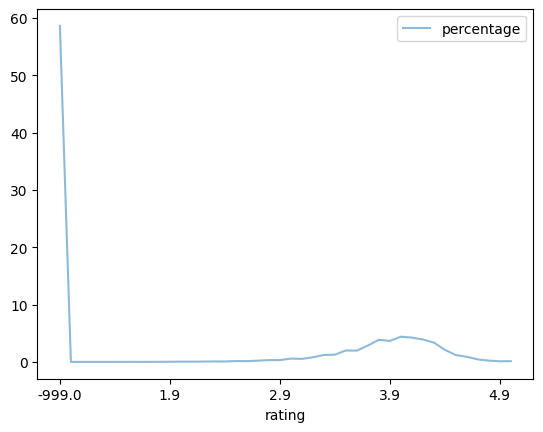

In [ ]:
ratings_df.plot(x="rating", y="percentage", alpha=0.5);

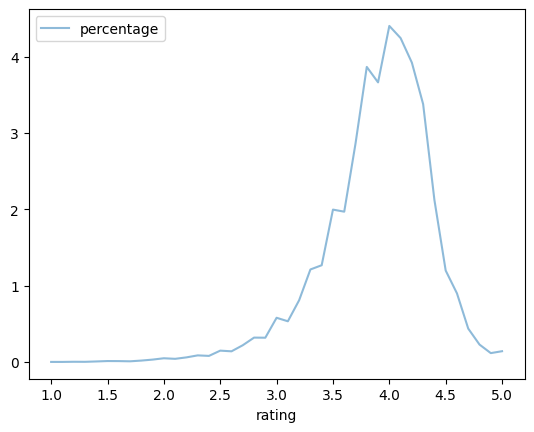

In [ ]:
ratings_df = ratings_df.tail(-1)
ratings_df.plot(x="rating", y="percentage", alpha=0.5);

In [ ]:
ratings_df

rating  percentage
1     1.0    0.000675
2     1.1    0.000675
3     1.2    0.002698
4     1.3    0.002024
5     1.4    0.006745
6     1.5    0.012141
7     1.6    0.011467
8     1.7    0.008769
9     1.8    0.018212
10    1.9    0.031028
11    2.0    0.048565
12    2.1    0.041145
13    2.2    0.060032
14    2.3    0.086338
15    2.4    0.079593
16    2.5    0.148393
17    2.6    0.139624
18    2.7    0.219217
19    2.8    0.319045
20    2.9    0.317696
21    3.0    0.578733
22    3.1    0.532866
23    3.2    0.808742
24    3.3    1.211426
25    3.4    1.266736
26    3.5    1.995211
27    3.6    1.968230
28    3.7    2.859263
29    3.8    3.863613
30    3.9    3.661259
31    4.0    4.400526
32    4.1    4.241341
33    4.2    3.919598
34    4.3    3.375940
35    4.4    2.121345
36    4.5    1.197261
37    4.6    0.898452
38    4.7    0.437085
39    4.8    0.227986
40    4.9    0.116016
41    5.0    0.140973

### Which city had the most restaurants?

In [ ]:
# dataframe -> split it by city into 821 smaller dataframes -> get the id column from each dataframe -> count the unique ids ->
# -> city, unique_count (821 dataframes) -> combine them -> sort -> top 20
df.groupby(['city'])['id'].nunique().sort_values(ascending=False).head(20)

city
Bikaner                      1665
Noida-1                      1424
Indirapuram,Delhi            1279
BTM,Bangalore                1159
Rohini,Delhi                 1135
Kothrud,Pune                 1086
Indiranagar,Bangalore        1079
Electronic City,Bangalore    1039
Greater Kailash 2,Delhi      1037
Vashi,Mumbai                 1021
Kukatpally,Hyderabad         1008
Viman Nagar,Pune             1000
sohna road,Gurgaon            973
Koramangala,Bangalore         953
Laxmi Nagar,Delhi             930
Gomti Nagar,Lucknow           915
HSR,Bangalore                 898
Malviya Nagar,Delhi           896
Madhapur,Hyderabad            892
Wakad,Pune                    868
Name: id, dtype: int64

### Which city has the best food?

In [ ]:
df.head()

id               name    city  rating     rating_count   cost  \
0  567335     AB FOODS POINT  Abohar  -999.0  Too Few Ratings  200.0   
1  531342  Janta Sweet House  Abohar     4.4      50+ ratings  200.0   
2  158203  theka coffee desi  Abohar     3.8     100+ ratings  100.0   
3  187912          Singh Hut  Abohar     3.7      20+ ratings  250.0   
4  543530      GRILL MASTERS  Abohar  -999.0  Too Few Ratings  250.0   

                      cuisine          lic_no  \
0            Beverages,Pizzas  22122652000138   
1               Sweets,Bakery  12117201000112   
2                   Beverages  22121652000190   
3            Fast Food,Indian  22119652000167   
4  Italian-American,Fast Food  12122201000053   

                                                link  \
0  https://www.swiggy.com/restaurants/ab-foods-po...   
1  https://www.swiggy.com/restaurants/janta-sweet...   
2  https://www.swiggy.com/restaurants/theka-coffe...   
3  https://www.swiggy.com/restaurants/singh-hut-n...   
4  https://www.swiggy.com/restaurants/grill-maste...   

                                             address              menu  
0  AB FOODS POINT, NEAR RISHI NARANG DENTAL CLINI...  Menu/567335.json  
1  Janta Sweet House, Bazar No.9, Circullar Road,...  Menu/531342.json  
2         theka coffee desi, sahtiya sadan road city  Menu/158203.json  
3    Singh Hut, CIRCULAR ROAD NEAR NEHRU PARK ABOHAR  Menu/187912.json  
4  GRILL MASTERS, ADA Heights, Abohar - Hanumanga...  Menu/543530.json

In [ ]:
df['rating_count'].unique()

array(['Too Few Ratings', '50+ ratings', '100+ ratings', '20+ ratings',
       '500+ ratings', '1K+ ratings', '5K+ ratings', '10K+ ratings'],
      dtype=object)

In [ ]:
# City with best restaurants
sub1 = df[df['rating_count'].isin(['100+ ratings','500+ ratings', '1K+ ratings', '5K+ ratings', '10K+ ratings'])]
sub1.head()

id                    name      city  rating  rating_count   cost  \
2   158203       theka coffee desi    Abohar     3.8  100+ ratings  100.0   
6   156588        shere punjab veg    Abohar     4.0  100+ ratings  150.0   
38  351387         NIKKU VEG THALI    Abohar     4.1  100+ ratings  150.0   
63  165533          IFC Restaurant  Adilabad     3.5  100+ ratings  400.0   
65  242943  Hot N Chill Restaurant  Adilabad     3.5  100+ ratings  150.0   

             cuisine          lic_no  \
2          Beverages  22121652000190   
6       North Indian  22120652000021   
38      North Indian  22121652000183   
63          American  13619001000093   
65  European,Italian  13619001000192   

                                                 link  \
2   https://www.swiggy.com/restaurants/theka-coffe...   
6   https://www.swiggy.com/restaurants/shere-punja...   
38  https://www.swiggy.com/restaurants/nikku-veg-t...   
63  https://www.swiggy.com/restaurants/ifc-restaur...   
65  https://www.swiggy.com/restaurants/hot-n-chill...   

                                              address              menu  
2          theka coffee desi, sahtiya sadan road city  Menu/158203.json  
6   shere punjab veg, major surinder chowk near ve...  Menu/156588.json  
38  NIKKU VEG THALI, College Road, Near Railway Li...  Menu/351387.json  
63  IFC Restaurant, Jagadamba Towers, Gandhi Print...  Menu/165533.json  
65  Hot N Chill Restaurant, H NO 4 -4 -703 BHUKTHA...  Menu/242943.json

In [ ]:
sub2 = sub1[sub1['rating'] >= 4.8]

In [ ]:
sub2

id                                               name  \
8710    332602    Kwality Walls Frozen Dessert and Ice Cream Shop   
10012   286156                                         SOUR HOUSE   
10766   446568                               Dairy Day Ice Creams   
12075   534276                                      NAALNAAD MANE   
13491   383734          Senoritas Mexican kitchen by Little Italy   
14164   237229                                       Omm Nom Nomm   
17471   537526                               Brahmins Thatte idli   
24366   161311                                      Ram Fast Food   
35066   310943    Kwality Walls Frozen Dessert and Ice Cream Shop   
48529   309376    Kwality Walls Frozen Dessert and Ice Cream Shop   
51467   217386                         Blue Tokai Coffee Roasters   
64713   509023                                          Chhaswala   
64719   459750                                   Anmol Bhel House   
64775   208823                                      Krishna Candy   
67267   330540    Kwality Walls Frozen Dessert and Ice Cream Shop   
74743   259810                               Govi's Organic Foods   
80593   478227                                      A1 NAAN MAHAL   
83634   509057                                        Mahi Bakery   
83799   513786                                        Tony Bakery   
83813   512200                        Aaradhya cafe and fast food   
87596   526984                             SHRI KRISHNA FOOD ZONE   
88805   124943                                  Natural Ice Cream   
89603   120944                                             Mithai   
89613   326540                                  Natural Ice Cream   
93947    37107                                  Natural Ice Cream   
94854   386631                                      Grameen Kulfi   
95769    61773             Pabrai's Fresh and Naturelle Ice Cream   
95973   510326    Kwality Walls Frozen Dessert and Ice Cream Shop   
96388   320887  Pabrai's Fresh And Naturelle Ice Cream - Jodhp...   
96786   317332                                        MOMO CIRCLE   
102268  363536    Kwality Walls Frozen Dessert and Ice Cream Shop   
103353  199911                                 Jain Tiffin Center   
103833  367817                                      Grameen Kulfi   
105275  428825                                            CAFE 99   
107319   30897                                  Natural Ice Cream   
107361   65688                                  Country of Origin   
107855  351117                                      Grameen Kulfi   
109597   57231                         Blue Tokai Coffee Roasters   
113710  100564                                      Shrikhandwala   
115498  355758                                      Grameen Kulfi   
118207   84377                                     Baskin Robbins   
128372  352810                                      Grameen Kulfi   
135613  467010                                     SUNSHINE SHAKE   

                                 city  rating  rating_count    cost  \
8710                        Balurghat     4.8  100+ ratings   300.0   
10012           Koramangala,Bangalore     4.8  100+ ratings   400.0   
10766              JP Nagar,Bangalore     4.8  100+ ratings   200.0   
12075               Arekere,Bangalore     4.8  100+ ratings   438.0   
13491           Indiranagar,Bangalore     4.8  100+ ratings   500.0   
14164            Whitefield,Bangalore     4.8  100+ ratings   600.0   
17471     Basaveshwaranagar,Bangalore     4.8  100+ ratings   150.0   
24366                         Barnala     4.9  100+ ratings    60.0   
35066               Annanagar,Chennai     4.8  100+ ratings   300.0   
48529                    Jasola,Delhi     4.9  500+ ratings   300.0   
51467         Greater Kailash 2,Delhi     4.8  100+ ratings   800.0   
64713                          Gondal     4.9  100+ ratings   150.0   
64719                          Gondal     4.8  100+ 

In [ ]:
sub2.city.value_counts()

Manasarovar,Jaipur               3
Gondal                           3
South Kolkata,Kolkata            2
Jadavpur,Kolkata                 2
Mahalaxmi Malabar Hill,Mumbai    2
Mansa                            1
Lake Town,Kolkata                1
Dumdum,Kolkata                   1
Dugri,Ludhiana                   1
Mandsaur                         1
Muktsar                          1
Central Kolkata,Kolkata          1
Vashi,Mumbai                     1
Scruz Bandra East,Mumbai         1
Bajaj Nagar,Nagpur               1
Nizamabad                        1
North-goa                        1
Hinjewadi,Pune                   1
Behala,Kolkata                   1
Balurghat                        1
Koramangala,Bangalore            1
Kolhapur                         1
Katni                            1
Tolichowki,Hyderabad             1
Banjara Hills,Hyderabad          1
Old Gurgaon (Zone 6),Gurgaon     1
Greater Kailash 2,Delhi          1
Jasola,Delhi                     1
Annanagar,Chennai   

### What is the cost distribution?

In [ ]:
df.cost.sort_values(ascending = False)

70762     300350.0
21626       8000.0
47552       6000.0
47817       5023.0
107779      5000.0
            ...   
94098          1.0
109636         1.0
121078         1.0
148236         1.0
43814          1.0
Name: cost, Length: 148255, dtype: float64

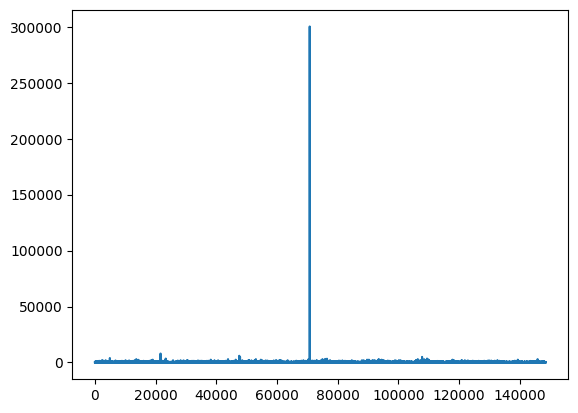

In [ ]:
df.cost.plot();

In [ ]:
import numpy as np
np.argmax(df['cost'])

70642

In [ ]:
df.iloc[70642]

id                                                         477718
name                                               KOHINOOR HOTEL
city                                                   Hinganghat
rating                                                     -999.0
rating_count                                      Too Few Ratings
cost                                                     300350.0
cuisine                                      North Indian,Chinese
lic_no                                             21521269001428
link            https://www.swiggy.com/restaurants/kohinoor-ho...
address         KOHINOOR HOTEL, LIBOURY CHOWK TAKA GROUND NR-B...
menu                                             Menu/477718.json
Name: 70762, dtype: object

In [ ]:
pd.set_option('display.max_colwidth', None)
df.iloc[70642]

id                                                                                           477718
name                                                                                 KOHINOOR HOTEL
city                                                                                     Hinganghat
rating                                                                                       -999.0
rating_count                                                                        Too Few Ratings
cost                                                                                       300350.0
cuisine                                                                        North Indian,Chinese
lic_no                                                                               21521269001428
link            https://www.swiggy.com/restaurants/kohinoor-hotel-hinganghat-city-hinganghat-477718
address                            KOHINOOR HOTEL, LIBOURY CHOWK TAKA GROUND NR-BUS STOP HINGANGHAT


In [ ]:
df = df[df['id'] != 477718]

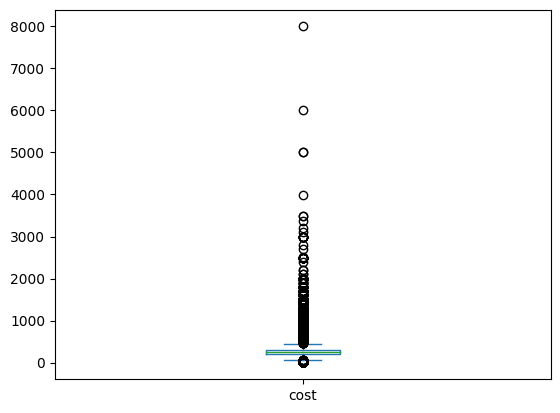

In [ ]:
df['cost'].plot(kind='box');

### What are the most expensive places?

In [ ]:
df.sort_values(by='cost', ascending = False).head(20)

id                            name  \
21626   456114                Oasis restaurant   
47552   565958          VENOM CLUB AND KITCHEN   
47817   524995            Aggarwal sweet india   
107779  564511                SHAAN RESTAURANT   
4930    579304       Rock N Shawarma Take Away   
109414  369682        Ministry of Crab, Mumbai   
23334   477654                     Olive Beach   
76454   469411                      SRS HAVMOR   
75847   471229                Sofra food court   
93507   312816                            SKAI   
74961   577851         THE KING STREET  BAKERS   
70387   521165                   Shree Rathnam   
43861   293932      KooX - Rooftop Asian Grill   
145836  550751                   CHIKN N GRILL   
53026   475991           Dilli Kanteen Kitchen   
106368  294454    Gourmet Couch By ITC Maratha   
13626   439995                     DFC KITCHEN   
53027   472240  Cascades - The Grand New Delhi   
108400  565948                  Mynt - Vivanta   
93509   312817                        Serafina   

                                         city  rating     rating_count  \
21626               Electronic City,Bangalore  -999.0  Too Few Ratings   
47552                   Hathibarkala,Dehradun  -999.0  Too Few Ratings   
47817                         GTB Nagar,Delhi  -999.0  Too Few Ratings   
107779                           Vashi,Mumbai  -999.0  Too Few Ratings   
4930                                    Ajmer  -999.0  Too Few Ratings   
109414               Scruz Bandra East,Mumbai  -999.0  Too Few Ratings   
23334             Central Bangalore,Bangalore  -999.0  Too Few Ratings   
76454                     Manikonda,Hyderabad  -999.0  Too Few Ratings   
75847               Vanasthalipuram,Hyderabad  -999.0  Too Few Ratings   
93507                 Central Kolkata,Kolkata  -999.0  Too Few Ratings   
74961                 Banjara Hills,Hyderabad  -999.0  Too Few Ratings   
70387                                   Hapur  -999.0  Too Few Ratings   
43861                         T Nagar,Chennai     3.7      20+ ratings   
145836  Benz Circle and Auto Nagar,Vijayawada  -999.0  Too Few Ratings   
53026                       Vasant Kunj,Delhi  -999.0  Too Few Ratings   
106368                           Powai,Mumbai     4.4      20+ ratings   
13626                   Indiranagar,Bangalore  -999.0  Too Few Ratings   
53027                       Vasant Kunj,Delhi  -999.0  Too Few Ratings   
108400                           Vashi,Mumbai  -999.0  Too Few Ratings   
93509                 Central Kolkata,Kolkata     4.3      20+ ratings   

          cost                    cuisine          lic_no  \
21626   8000.0       Biryani,North Indian  21221010000753   
47552   6000.0             Italian,Indian  12621005000488   
47817   5023.0                    Chinese  23320002000105   
107779  5000.0             Chinese,Indian  11522016000100   
4930    3999.0                    Arabian  22221056000763   
109414  3500.0         Sri Lankan,Seafood  11518006000877   
23334   3500.0      Italian,Mediterranean  11218333000076   
76454   3360.0           Ice Cream,Bakery  23621028003146   
75847   3200.0            Arabian,Afghani  13621012001099   
93507   3100.0             Asian,European  12818019006281   
74961   3000.0              Bakery,Snacks  23622030001280   
70387   3000.0  South Indian,North Indian  12718073000174   
43861   3000.0              Pizzas,Pastas  12417002004275   
145836  3000.0                      Grill  20122006001273   
53026   3000.0      North Indian,European  10013011001265   
106368  3000.0           Japanese,Mughlai  10012022000427   
13626   3000.0                     Indian  21221190001305   
53027   3000.0      North Indian,European  10013011001265   
108400  2800.0               Indian,Asian  11522016000033   
93509   2700.0             Italian,Pizzas  12816019000499   

                                                                                                   link  \
21626            

### What are the most cuisine types?

In [ ]:
sub3 = df[df['rating'] > 3.5]
len(sub3)

49560

In [ ]:
sub3.cuisine.nunique()

1530

In [ ]:
sub3.cuisine.value_counts(ascending = False)

North Indian,Chinese     2191
South Indian             1439
Indian                   1412
Indian,Chinese           1389
North Indian             1372
                         ... 
Awadhi,Lucknowi             1
Thalis,Tandoor              1
Persian,Arabian             1
Indian,Kashmiri             1
South American,Andhra       1
Name: cuisine, Length: 1530, dtype: int64

In [ ]:
# Another way of doing the same thing
cuisine_list = sub3.cuisine.tolist()
len(cuisine_list)
split_cuisine_list = [y.lower() for x in cuisine_list for y in x.split(',')]
len(split_cuisine_list)
sample_split_cuisine_list = []
sample_cuisine_list = cuisine_list[:10]
sample_cuisine_list
for x in sample_cuisine_list:
  print("Value for x:")
  print(x)
  for y in x.split(','):
    print("Value for y:")
    print(y)
    sample_split_cuisine_list.append(y.lower())
    print("Current state of sample_split_cuisine_list")
    print(sample_split_cuisine_list)
    print("==============================")

Value for x:
Sweets,Bakery
Value for y:
Sweets
Current state of sample_split_cuisine_list
['sweets']
Value for y:
Bakery
Current state of sample_split_cuisine_list
['sweets', 'bakery']
Value for x:
Beverages
Value for y:
Beverages
Current state of sample_split_cuisine_list
['sweets', 'bakery', 'beverages']
Value for x:
Fast Food,Indian
Value for y:
Fast Food
Current state of sample_split_cuisine_list
['sweets', 'bakery', 'beverages', 'fast food']
Value for y:
Indian
Current state of sample_split_cuisine_list
['sweets', 'bakery', 'beverages', 'fast food', 'indian']
Value for x:
Continental
Value for y:
Continental
Current state of sample_split_cuisine_list
['sweets', 'bakery', 'beverages', 'fast food', 'indian', 'continental']
Value for x:
North Indian
Value for y:
North Indian
Current state of sample_split_cuisine_list
['sweets', 'bakery', 'beverages', 'fast food', 'indian', 'continental', 'north indian']
Value for x:
Snacks,Chaat
Value for y:
Snacks
Current state of sample_split_cuisi

In [ ]:
from collections import Counter
cuisine_frequency = Counter(split_cuisine_list)

In [ ]:
help(Counter)

Help on class Counter in module collections:

class Counter(builtins.dict)
 |  Counter(iterable=None, /, **kwds)
 |  
 |  Dict subclass for counting hashable items.  Sometimes called a bag
 |  or multiset.  Elements are stored as dictionary keys and their counts
 |  are stored as dictionary values.
 |  
 |  >>> c = Counter('abcdeabcdabcaba')  # count elements from a string
 |  
 |  >>> c.most_common(3)                # three most common elements
 |  [('a', 5), ('b', 4), ('c', 3)]
 |  >>> sorted(c)                       # list all unique elements
 |  ['a', 'b', 'c', 'd', 'e']
 |  >>> ''.join(sorted(c.elements()))   # list elements with repetitions
 |  'aaaaabbbbcccdde'
 |  >>> sum(c.values())                 # total of all counts
 |  15
 |  
 |  >>> c['a']                          # count of letter 'a'
 |  5
 |  >>> for elem in 'shazam':           # update counts from an iterable
 |  ...     c[elem] += 1                # by adding 1 to each element's count
 |  >>> c['a']                

In [ ]:
cuisine_frequency

Counter({'sweets': 1420,
         'bakery': 2887,
         'beverages': 4500,
         'fast food': 3094,
         'indian': 6427,
         'continental': 1610,
         'north indian': 11584,
         'snacks': 4108,
         'chaat': 521,
         'desserts': 5555,
         'chinese': 10680,
         'mughlai': 1391,
         'pizzas': 3067,
         'biryani': 4771,
         'south indian': 5357,
         'american': 1839,
         'street food': 594,
         'tandoor': 729,
         'nepalese': 23,
         'ice cream': 2783,
         'bengali': 464,
         'italian': 1912,
         'pastas': 372,
         'hyderabadi': 333,
         'waffle': 75,
         'burgers': 348,
         'tibetan': 408,
         'lucknowi': 19,
         'thalis': 477,
         'kebabs': 327,
         'asian': 717,
         'thai': 399,
         'north eastern': 16,
         'seafood': 308,
         'punjabi': 1044,
         'barbecue': 316,
         'mexican': 391,
         'healthy food': 1035,
      

In [ ]:
cuisine_frequency.most_common()

[('north indian', 11584),
 ('chinese', 10680),
 ('indian', 6427),
 ('desserts', 5555),
 ('south indian', 5357),
 ('biryani', 4771),
 ('beverages', 4500),
 ('snacks', 4108),
 ('fast food', 3094),
 ('pizzas', 3067),
 ('bakery', 2887),
 ('ice cream', 2783),
 ('italian', 1912),
 ('american', 1839),
 ('continental', 1610),
 ('sweets', 1420),
 ('mughlai', 1391),
 ('punjabi', 1044),
 ('healthy food', 1035),
 ('arabian', 880),
 ('tandoor', 729),
 ('asian', 717),
 ('street food', 594),
 ('salads', 535),
 ('juices', 524),
 ('chaat', 521),
 ('thalis', 477),
 ('bengali', 464),
 ('tibetan', 408),
 ('thai', 399),
 ('mexican', 391),
 ('pastas', 372),
 ('andhra', 352),
 ('burgers', 348),
 ('hyderabadi', 333),
 ('maharashtrian', 329),
 ('kebabs', 327),
 ('barbecue', 316),
 ('seafood', 308),
 ('kerala', 307),
 ('lebanese', 265),
 ('pan-asian', 245),
 ('home food', 243),
 ('combo', 212),
 ('chettinad', 187),
 ('gujarati', 167),
 ('grill', 121),
 ('japanese', 110),
 ('italian-american', 109),
 ('european'

### What is the most expensive combination of cuisines?

In [ ]:
import pandas as pd
from collections import Counter

# Assuming you have the DataFrame and cuisine_frequency Counter from previous steps

# Step 1: Remove uncommon cuisines
common_cuisines = [cuisine for cuisine, count in cuisine_frequency.items() if count >= 10]
df_common_cuisines = df[df['cuisine'].apply(lambda x: any(cuisine in common_cuisines for cuisine in x.split(',')))]

# Step 2: Group by Cuisine and Calculate the 75th Percentile (Q3) of Cost
df_q3_cost_by_cuisine = df_common_cuisines.groupby('cuisine')['cost'].quantile(0.75).reset_index()

# Step 3: Sort by Q3 Cost in Descending Order
df_q3_cost_by_cuisine_sorted = df_q3_cost_by_cuisine.sort_values(by='cost', ascending=False)

# Display the sorted DataFrame with Q3 costs
print(df_q3_cost_by_cuisine_sorted)

# Set the Q3 threshold
q3_threshold = df_q3_cost_by_cuisine_sorted['cost'].iloc[0]  # Using the Q3 of the highest-cost cuisine

# Step 4: Filter cuisines with costs higher than the Q3 threshold
high_cost_cuisines = df_common_cuisines[df_common_cuisines['cost'] > q3_threshold]

# Display the result
print(high_cost_cuisines)


           cuisine   cost
0  Tandoor ,indian  500.0
Empty DataFrame
Columns: [id, name, city, rating, rating_count, cost, cuisine, lic_no, link, address, menu]
Index: []


In [ ]:
import pandas as pd
from collections import Counter

# Assuming you have the DataFrame and cuisine_frequency Counter from previous steps

# Step 1: Remove uncommon cuisines
common_cuisines = [cuisine for cuisine, count in cuisine_frequency.items() if count >= 10]
df_common_cuisines = df[df['cuisine'].apply(lambda x: any(cuisine in common_cuisines for cuisine in x.split(',')))]

# Step 2: Calculate the 75th Percentile (Q3) of Cost
order_value_threshold = df_common_cuisines['cost'].quantile(0.75)

# Step 3: Filter cuisines with costs higher than the Q3 threshold
high_order_value_cuisines = df_common_cuisines[df_common_cuisines['cost'] > order_value_threshold]

# Display the result
print(high_order_value_cuisines)


Empty DataFrame
Columns: [id, name, city, rating, rating_count, cost, cuisine, lic_no, link, address, menu]
Index: []


In [ ]:
swiggy1_df = df.copy()
swiggy1_df['rating_count'] = swiggy1_df['rating_count'].str.replace('+','').str.replace('K','000').str.replace('Too Few Ratings', '0').str.replace('ratings', '')
swiggy1_df.head(10)

<ipython-input-49-24e5871d41d9>:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  swiggy1_df['rating_count'] = swiggy1_df['rating_count'].str.replace('+','').str.replace('K','000').str.replace('Too Few Ratings', '0').str.replace('ratings', '')


id                       name    city  rating rating_count   cost  \
0  567335             AB FOODS POINT  Abohar  -999.0            0  200.0   
1  531342          Janta Sweet House  Abohar     4.4          50   200.0   
2  158203          theka coffee desi  Abohar     3.8         100   100.0   
3  187912                  Singh Hut  Abohar     3.7          20   250.0   
4  543530              GRILL MASTERS  Abohar  -999.0            0  250.0   
5  158204                  Sam Uncle  Abohar     3.6          20   200.0   
6  156588           shere punjab veg  Abohar     4.0         100   150.0   
7  244866  Shri Balaji Vaishno Dhaba  Abohar  -999.0            0  100.0   
8  156602   Hinglaj Kachori Bhandhar  Abohar     4.2          20   100.0   
9  158193                  yummy hub  Abohar  -999.0            0  200.0   

                      cuisine          lic_no  \
0            Beverages,Pizzas  22122652000138   
1               Sweets,Bakery  12117201000112   
2                   Beverages  22121652000190   
3            Fast Food,Indian  22119652000167   
4  Italian-American,Fast Food  12122201000053   
5                 Continental  22119652000052   
6                North Indian  22120652000021   
7                North Indian  22119652000389   
8                Snacks,Chaat  22119652000042   
9                      Indian  22119652000045   

                                                                                            link  \
0                 https://www.swiggy.com/restaurants/ab-foods-point-central-abohar-abohar-567335   
1              https://www.swiggy.com/restaurants/janta-sweet-house-central-abohar-abohar-531342   
2             https://www.swiggy.com/restaurants/theka-coffee-desi-central-raipura-abohar-158203   
3               https://www.swiggy.com/restaurants/singh-hut-nehru-park-main-bazar-abohar-187912   
4                  https://www.swiggy.com/restaurants/grill-masters-central-abohar-abohar-543530   
5                  https://www.swiggy.com/restaurants/sam-uncle-central-main-bazar-abohar-158204   
6        https://www.swiggy.com/restaurants/shere-punjab-veg-central-krishna-nagri-abohar-156588   
7  https://www.swiggy.com/restaurants/shri-balaji-vaishno-dhaba-central-main-bazar-abohar-244866   
8   https://www.swiggy.com/restaurants/hinglaj-kachori-bhandhar-central-main-bazar-abohar-156602   
9                      https://www.swiggy.com/restaurants/yummy-hub-central-abohar-abohar-158193   

                                                                                      address  \
0                    AB FOODS POINT, NEAR RISHI NARANG DENTAL CLINIC , NEAR IDBI BANK, ABOHAR   
1                                       Janta Sweet House, Bazar No.9, Circullar Road, Abohar   
2                                                  theka coffee desi, sahtiya sadan road city   
3                                             Singh Hut, CIRCULAR ROAD NEAR NEHRU PARK ABOHAR   
4  GRILL MASTERS, ADA Heights, Abohar - Hanumangarh Rd, Raipura, Abohar, Punjab 152116, India   
5                                 Sam Uncle, hanumangarh road near raja bajaj showroom abohar   
6  shere punjab veg, major surinder chowk near verma sons petrol pump and lic building abohar   
7           Shri Balaji Vaishno Dhaba, St no 13,6th chowk,main Bazar,near jain bhawan, abohar   
8                                Hinglaj Kachori Bhandhar, street no 11 circular road ,Abohar   
9                             yummy hub, hanumangarh road near dr naveen sethi hospitalabohar   

               menu  
0  Menu/567335.json  
1  Menu/531342.json  
2  Menu/158203.json  
3  Menu/187912.json  
4  Menu/543530.json  
5  Menu/158204.json  
6  Menu/156588.json  
7  Menu/244866.json  
8  Menu/156602.json  
9  Menu/158193.json

In [ ]:
swiggy1_df.sample(5)

id                  name                  city  rating  \
33273   546763    The House of Spice  Panchkula,Chandigarh  -999.0   
1863    548015  Gorabandh Restaurant        GOTA,Ahmedabad  -999.0   
138013  311474              Foodbook              Siliguri     3.8   
118050  340274          Kulcha House             North-goa  -999.0   
88968   132016           Biryani Pot              Kolhapur  -999.0   

       rating_count   cost                cuisine          lic_no  \
33273             0  200.0  American,North Indian         license   
1863              0  200.0   North Indian,Chinese  10718009000055   
138013          50   150.0         Indian,Biryani  22820020000177   
118050            0  500.0           North Indian  20621001000793   
88968             0  250.0                Biryani  21517255000467   

                                                                                              link  \
33273            https://www.swiggy.com/restaurants/the-house-of-spice-panchkula-chandigarh-546763   
1863                 https://www.swiggy.com/restaurants/gorabandh-restaurant-gota-ahmedabad-548015   
138013         https://www.swiggy.com/restaurants/foodbook-khalpara-mahananda-para-siliguri-311474   
118050    https://www.swiggy.com/restaurants/kulcha-house-baga-calangute-arpora-central-goa-340274   
88968   https://www.swiggy.com/restaurants/biryani-pot-gandhi-maidan-hari-om-nagar-kolhapur-132016   

                                                                                                                                                                                              address  \
33273   The House of Spice, 01, Aai Ekveera Chawi, Samshan Bhumi Bhopar goan road, Kalyan tahashil {except kalyan dombivall municipal corporation{ kalyan Tahashil( thane Zone-8), Maharashtra-421201   
1863                                                                                                                      Gorabandh Restaurant, SR.NO.561, S G HIGHWAY, AT.KHORAJ, GANDHINAGAR-382735   
138013                                                                                                           Foodbook, Sishodangi, Matigara,Near 4th Mahananda Bridge,Matigara Panchayat,siliguri   
118050                                                                                          Kulcha House, Punjabi Uncle's Kitchen, Opposite Saturday Night Bazaar, Arpora,  North Goa , Goa403516   
88968                                                                                          Biryani Pot, Waterfront complex shop no. 25 rankala lake Near D mart Kolhapur, Hari Om Nagar, Kolhapur   

                    menu  
33273   Menu/546763.json  
1863    Menu/548015.json  
138013  Menu/311474.json  
118050  Menu/340274.json  
88968   Menu/132016.json

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objs as go
from plotly.subplots import make_subplots

In [ ]:
fig = px.box(swiggy1_df,
              y = 'cost',
              title= 'Central Tendencies for Cost Column');
fig.show()

In [ ]:
import plotly.express as px

# Assuming swiggy1_df is your DataFrame

# Calculate the 95th percentile
percentile_95 = swiggy1_df['cost'].quantile(0.95)

# Filter the data to include only values up to the 95th percentile
filtered_data = swiggy1_df[swiggy1_df['cost'] <= percentile_95]

# Create a box plot using the filtered data
fig = px.box(filtered_data,
             y='cost',
             title='Central Tendencies for Cost Column')

# Show the plot
fig.show()


In [ ]:
swiggy1_df['rating'] = swiggy1_df['rating'].astype(float)
swiggy1_df['rating_count'] = swiggy1_df['rating_count'].astype(int)
swiggy1_df['cost'] = swiggy1_df['cost'].astype(int)

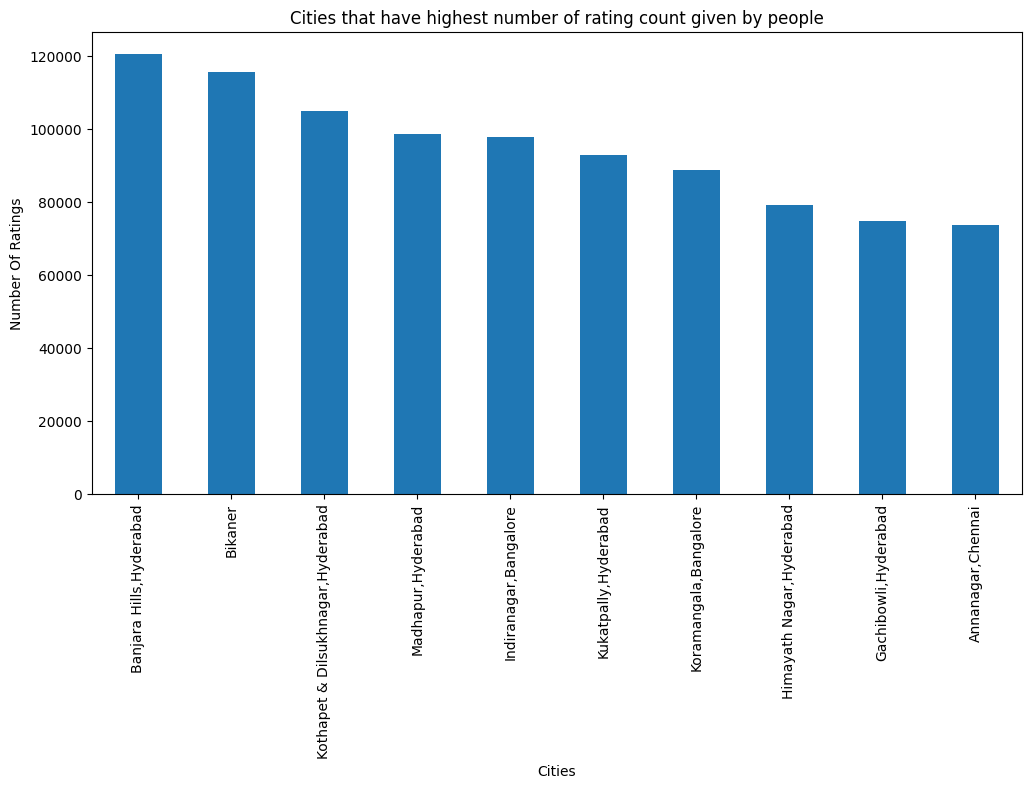

In [ ]:
highest_city_rating_count = swiggy1_df.groupby('city')['rating_count'].sum().sort_values(ascending=False)

plt.figure(figsize=(12,6))
highest_city_rating_count.head(10).plot.bar()
plt.xlabel('Cities')
plt.ylabel('Number Of Ratings')
plt.title('Cities that have highest number of rating count given by people')
plt.show();

Banjara Hills Hyderabad got the highest number of rating_count which is equal to 12000

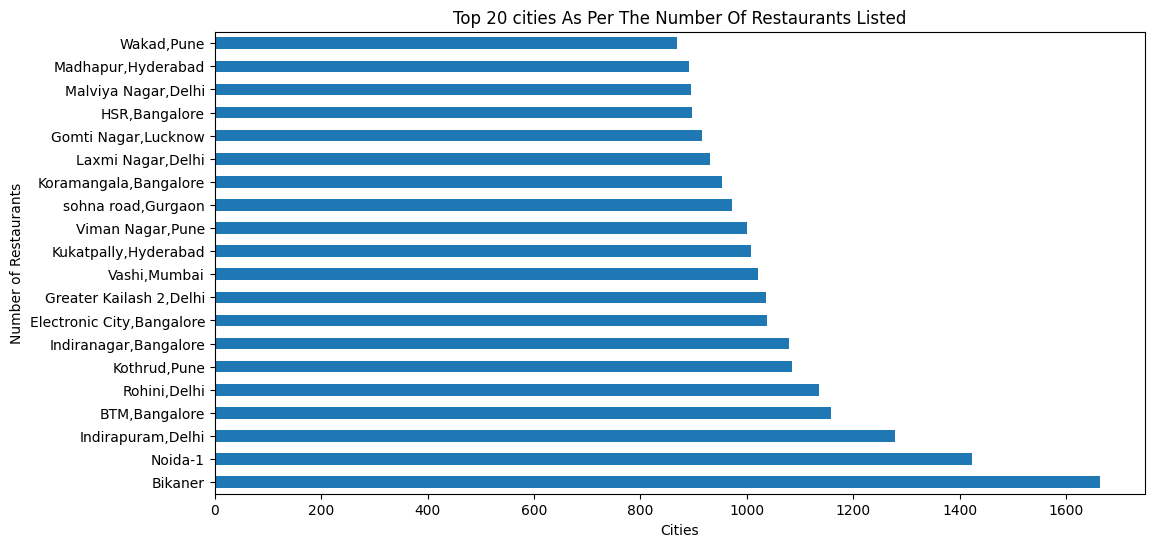

In [ ]:
top_rest_df = swiggy1_df.groupby('city')['name'].count().sort_values(ascending=False)

plt.figure(figsize=(12, 6))
top_rest_df.head(20).plot.barh()
plt.xlabel('Cities')
plt.ylabel('Number of Restaurants')
plt.title('Top 20 cities As Per The Number Of Restaurants Listed')
plt.show()

Bikaner has the maximum number of restaurants listed which is more than 16000. On second place we have Noida-1, it has more than 14000 restaurants.

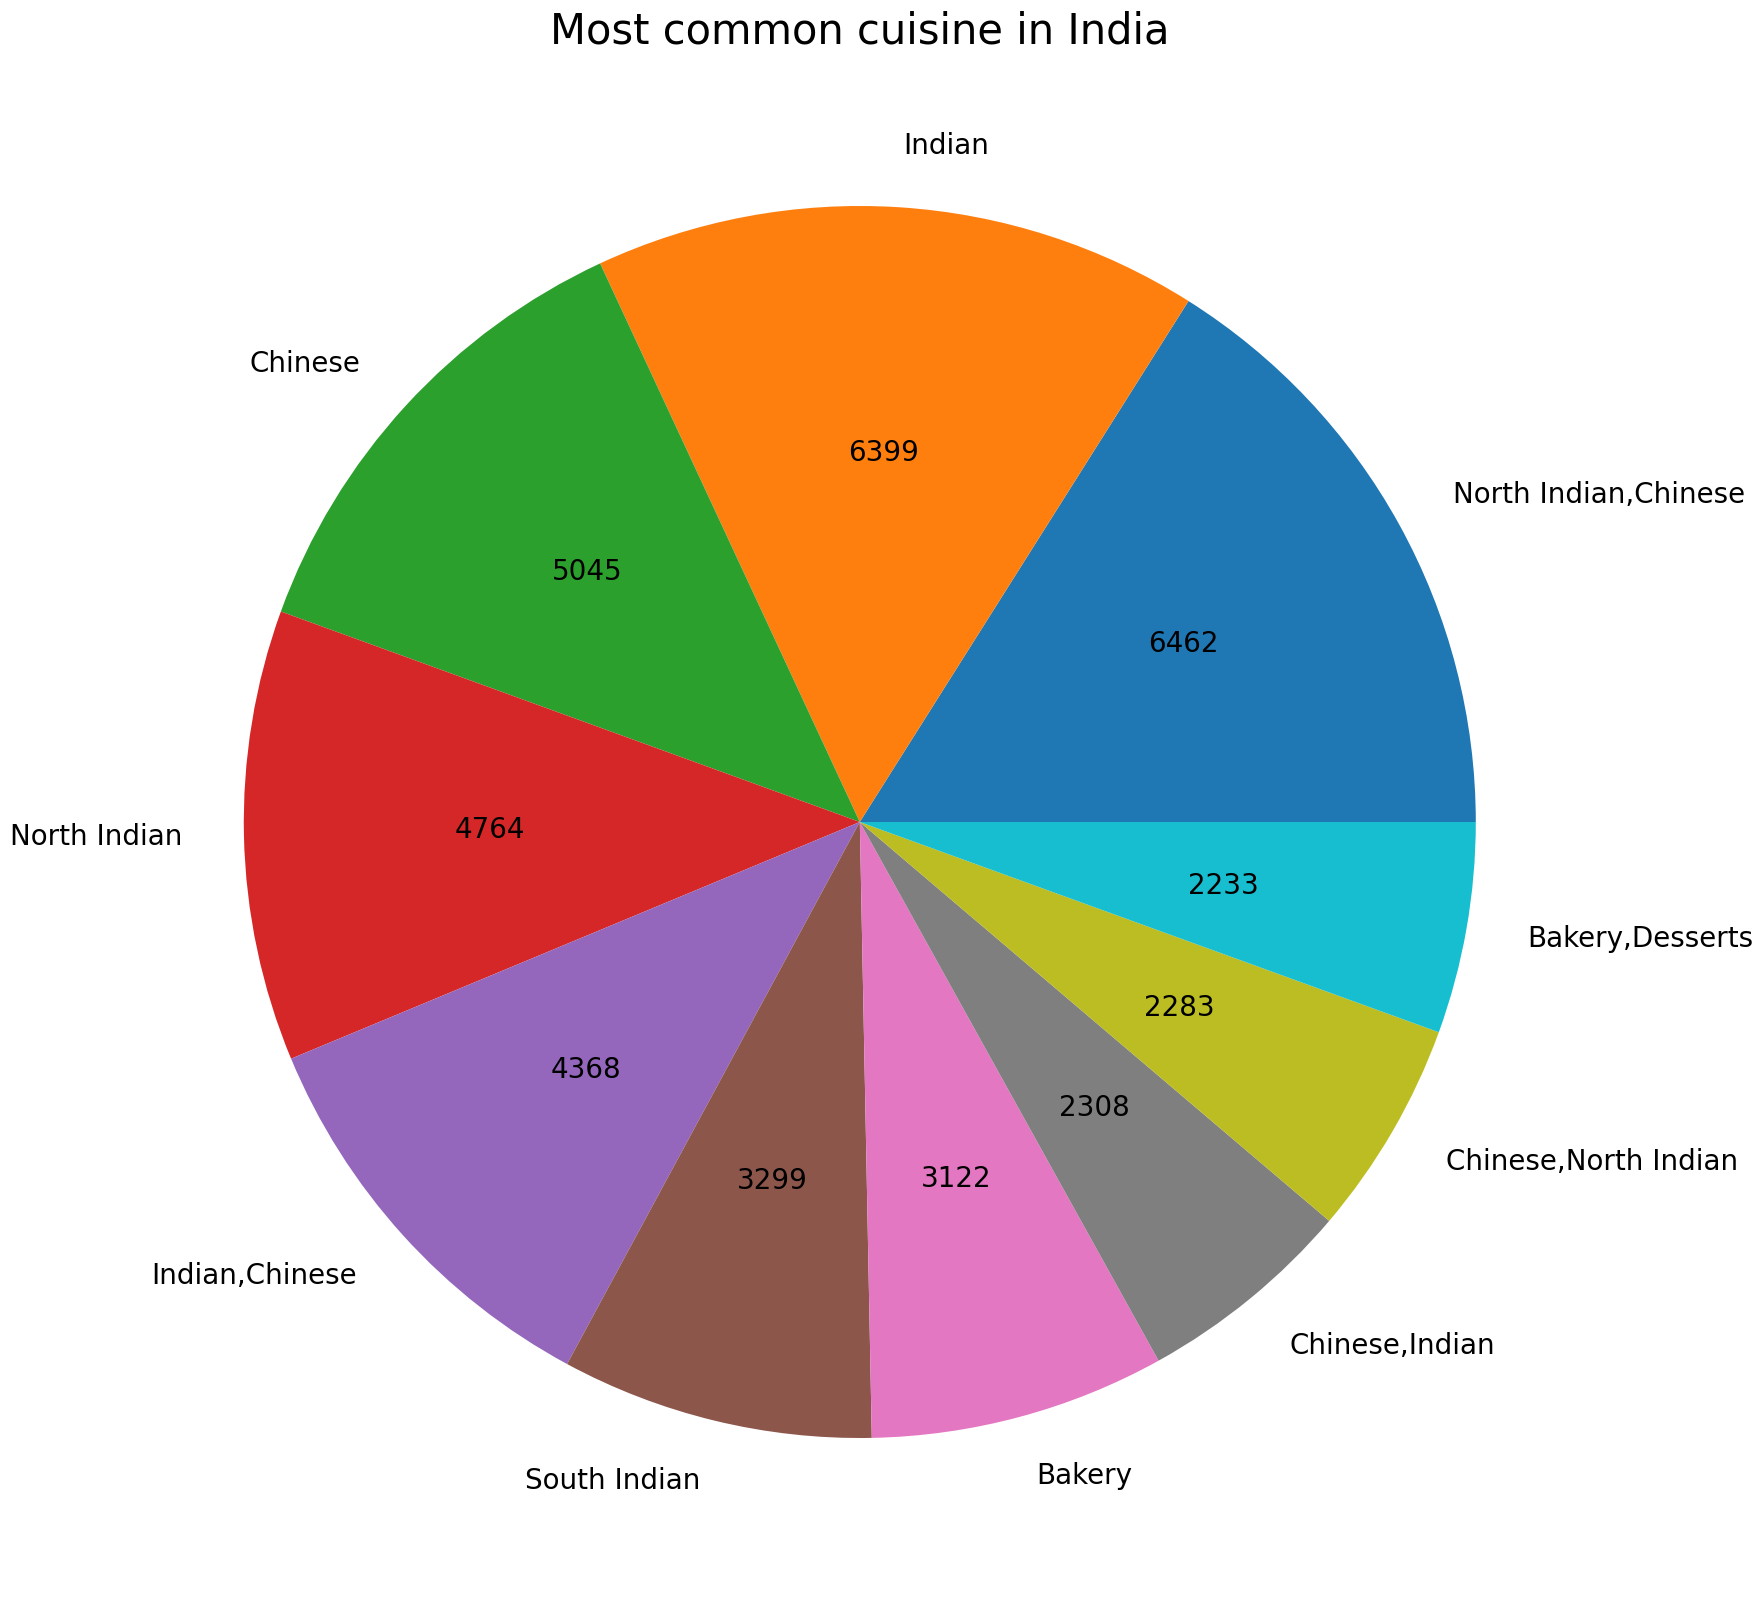

In [ ]:
data = swiggy1_df.groupby('cuisine').size().sort_values(ascending = False).head(10)

count = data.values
names  = data.index

def format(p,count):
    value = p/100 * sum(count)

    value += 1 if float('.'+str(value).split('.')[-1]) > 0.5 else 0
    return f'{int(value)}'

plt.rc('font', **{'size':20})
plt.figure(figsize=(20,20))
plt.pie(count,labels = names,autopct = lambda p : format(p,count))

plt.title('Most common cuisine in India', fontsize = 30 )
plt.show()

In [ ]:
measures_df = pd.DataFrame(swiggy1_df.describe())
Measures = ['Count', 'Average', 'Std_dev','Minimum','Q1','Q2','Q3','Maximum']

In [ ]:
measures_df['Central Tendencies'] = Measures
measures_df

id         rating   rating_count           cost  \
count  148254.000000  148254.000000  148254.000000  148254.000000   
mean   363737.038832    -584.032727      58.377717     285.580956   
std    167787.463893     493.935519     225.265045     167.589479   
min       211.000000    -999.000000       0.000000       1.000000   
25%    234018.750000    -999.000000       0.000000     200.000000   
50%    412934.500000    -999.000000       0.000000     250.000000   
75%    502340.250000       3.800000      50.000000     300.000000   
max    581031.000000       5.000000   10000.000000    8000.000000   

      Central Tendencies  
count              Count  
mean             Average  
std              Std_dev  
min              Minimum  
25%                   Q1  
50%                   Q2  
75%                   Q3  
max              Maximum

In [ ]:
fig = px.line(measures_df,
             x = 'Central Tendencies',
             y = 'cost',
             title= 'Central Tendencies for Cost');
fig.show()

The above graph shows that the average, std_dev, q1, q2,q3 are of similar range but the Maximum is of a 8000 and minimum is 1

Relation between Top cities as per the number of restaurants listed and City with highest rating count

In [ ]:
combined_df = pd.merge(top_rest_df, highest_city_rating_count, on = 'city' )

In [ ]:
fig = px.scatter(combined_df,
                 x = 'rating_count',
                 y = 'name',
                 size = 'rating_count',
                 title = 'Relation Between Number Of Restaurants Listed And Rating Counts',
                 color = combined_df.index)
fig.update_yaxes(title_text='Number Of the Restaurant in City')
fig.update_xaxes(title_text='Number Of the Ratings Given')
fig.show()

From the above graph we can conclude:-

Banjara Hills, Hyderabad has highest number of rating counts i.e 120720.
Bikaner has higest number of restaurants i.e 1666.

Text(0, 0.5, 'Number Of Listed Restaurant')

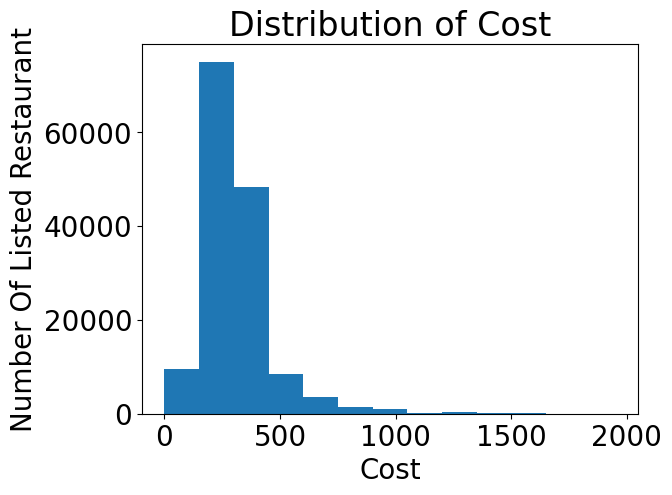

In [ ]:
plt.hist(swiggy1_df['cost'], bins=np.arange(0, 2000, 150));
plt.title('Distribution of Cost')
plt.xlabel('Cost')
plt.ylabel('Number Of Listed Restaurant')

Lets Visualize The Highest Cost Of Food In Every City

In [ ]:
highest_cost_name_df = swiggy1_df.groupby('city')['cost'].max().sort_values(ascending = False).reset_index()

In [ ]:
fig = px.bar(highest_cost_name_df.head(50),
             x = 'cost',
             y = 'city',
             barmode = 'relative',
             title = 'Highest Cost Of Food In Every City')
fig.show()

From the above graph, we can say that Electronic City, Bangalore has the highest cost of food in all over India.

Lets plot highest rating_count and rating for cuisines for the first 3000 cuisines


In [ ]:
#Lets first sort our dataframe swiggy1_df for column rating in decreasing order
highest_rating_count = swiggy1_df.sort_values(by='rating', ascending=False).reset_index()

In [ ]:
fig = px.sunburst(highest_rating_count.head(3000),
                  path = ['cuisine','rating'],
                  values = 'rating_count',
                  color = 'cost',
                  color_continuous_scale='RdBu',
                  title = 'Cuisines With Maximum Rating Count')
fig.show();

From the above grapgh there are few things to notice:-

The Cuisine Ice Cream, Deserts have the highest rating count which is
more than 60k.
The highest cost for Ice Cream, Desserts restaurants is 289.

What are those cities that has most expensive food in their restaurants ?

In [ ]:
most_exp_df = swiggy1_df.groupby('city')[['cost','rating_count','rating']].mean().sort_values(by='cost', ascending = False).head(10)
city_cost_df = most_exp_df.reset_index()

In [ ]:
fig = px.scatter(city_cost_df,
                 x = 'cost',
                 y = 'rating_count',
                 size = 'cost',
                 title = 'Cities That Has Most Expensive Food In Their Restaurants',
                 color = 'rating',
                 hover_data = {'city': True})
fig.update_yaxes(title_text='Number Of Ratings Counts')
fig.update_xaxes(title_text='Cost')
fig.update_layout(width=800, height=600)
fig.show()

BBK_ Chattarpur Delhi has most expensive food on average having cost of 800 but it has 0 rating count so no rating is given for this city. On second place, we have Khan Market Delhi which has average cost around 600.
Most Of cities food cost lies between 450 to 500 on average.
The city Jubilee Hills Hyderabad has highest rating count given by people among top 10 most expensive food.
All the cities contain low ratings on average.

What are the most Popular Cuisines served throughout the dataset?

In [ ]:
a = []
for i in swiggy1_df['cuisine'].values:
    try:
        for j in i.split(','):
            a.append(j)

    except:
        a.append(i)

popular_cuisine_df = pd.DataFrame({"all_cuisine":a}).value_counts()
popular_cuisine_df.head(10)

all_cuisine 
Chinese         36419
North Indian    32485
Indian          25688
Snacks          17214
Biryani         14513
Beverages       14261
Fast Food       13881
South Indian    11999
Desserts        11183
Pizzas           9838
dtype: int64

The most poular cuisine is Chinese which is serverd in 36419 restaurants of India.
On second and third position we have North Indian and Indian cuisines which are served in 32485 and 25688 restaurants respectively in India.

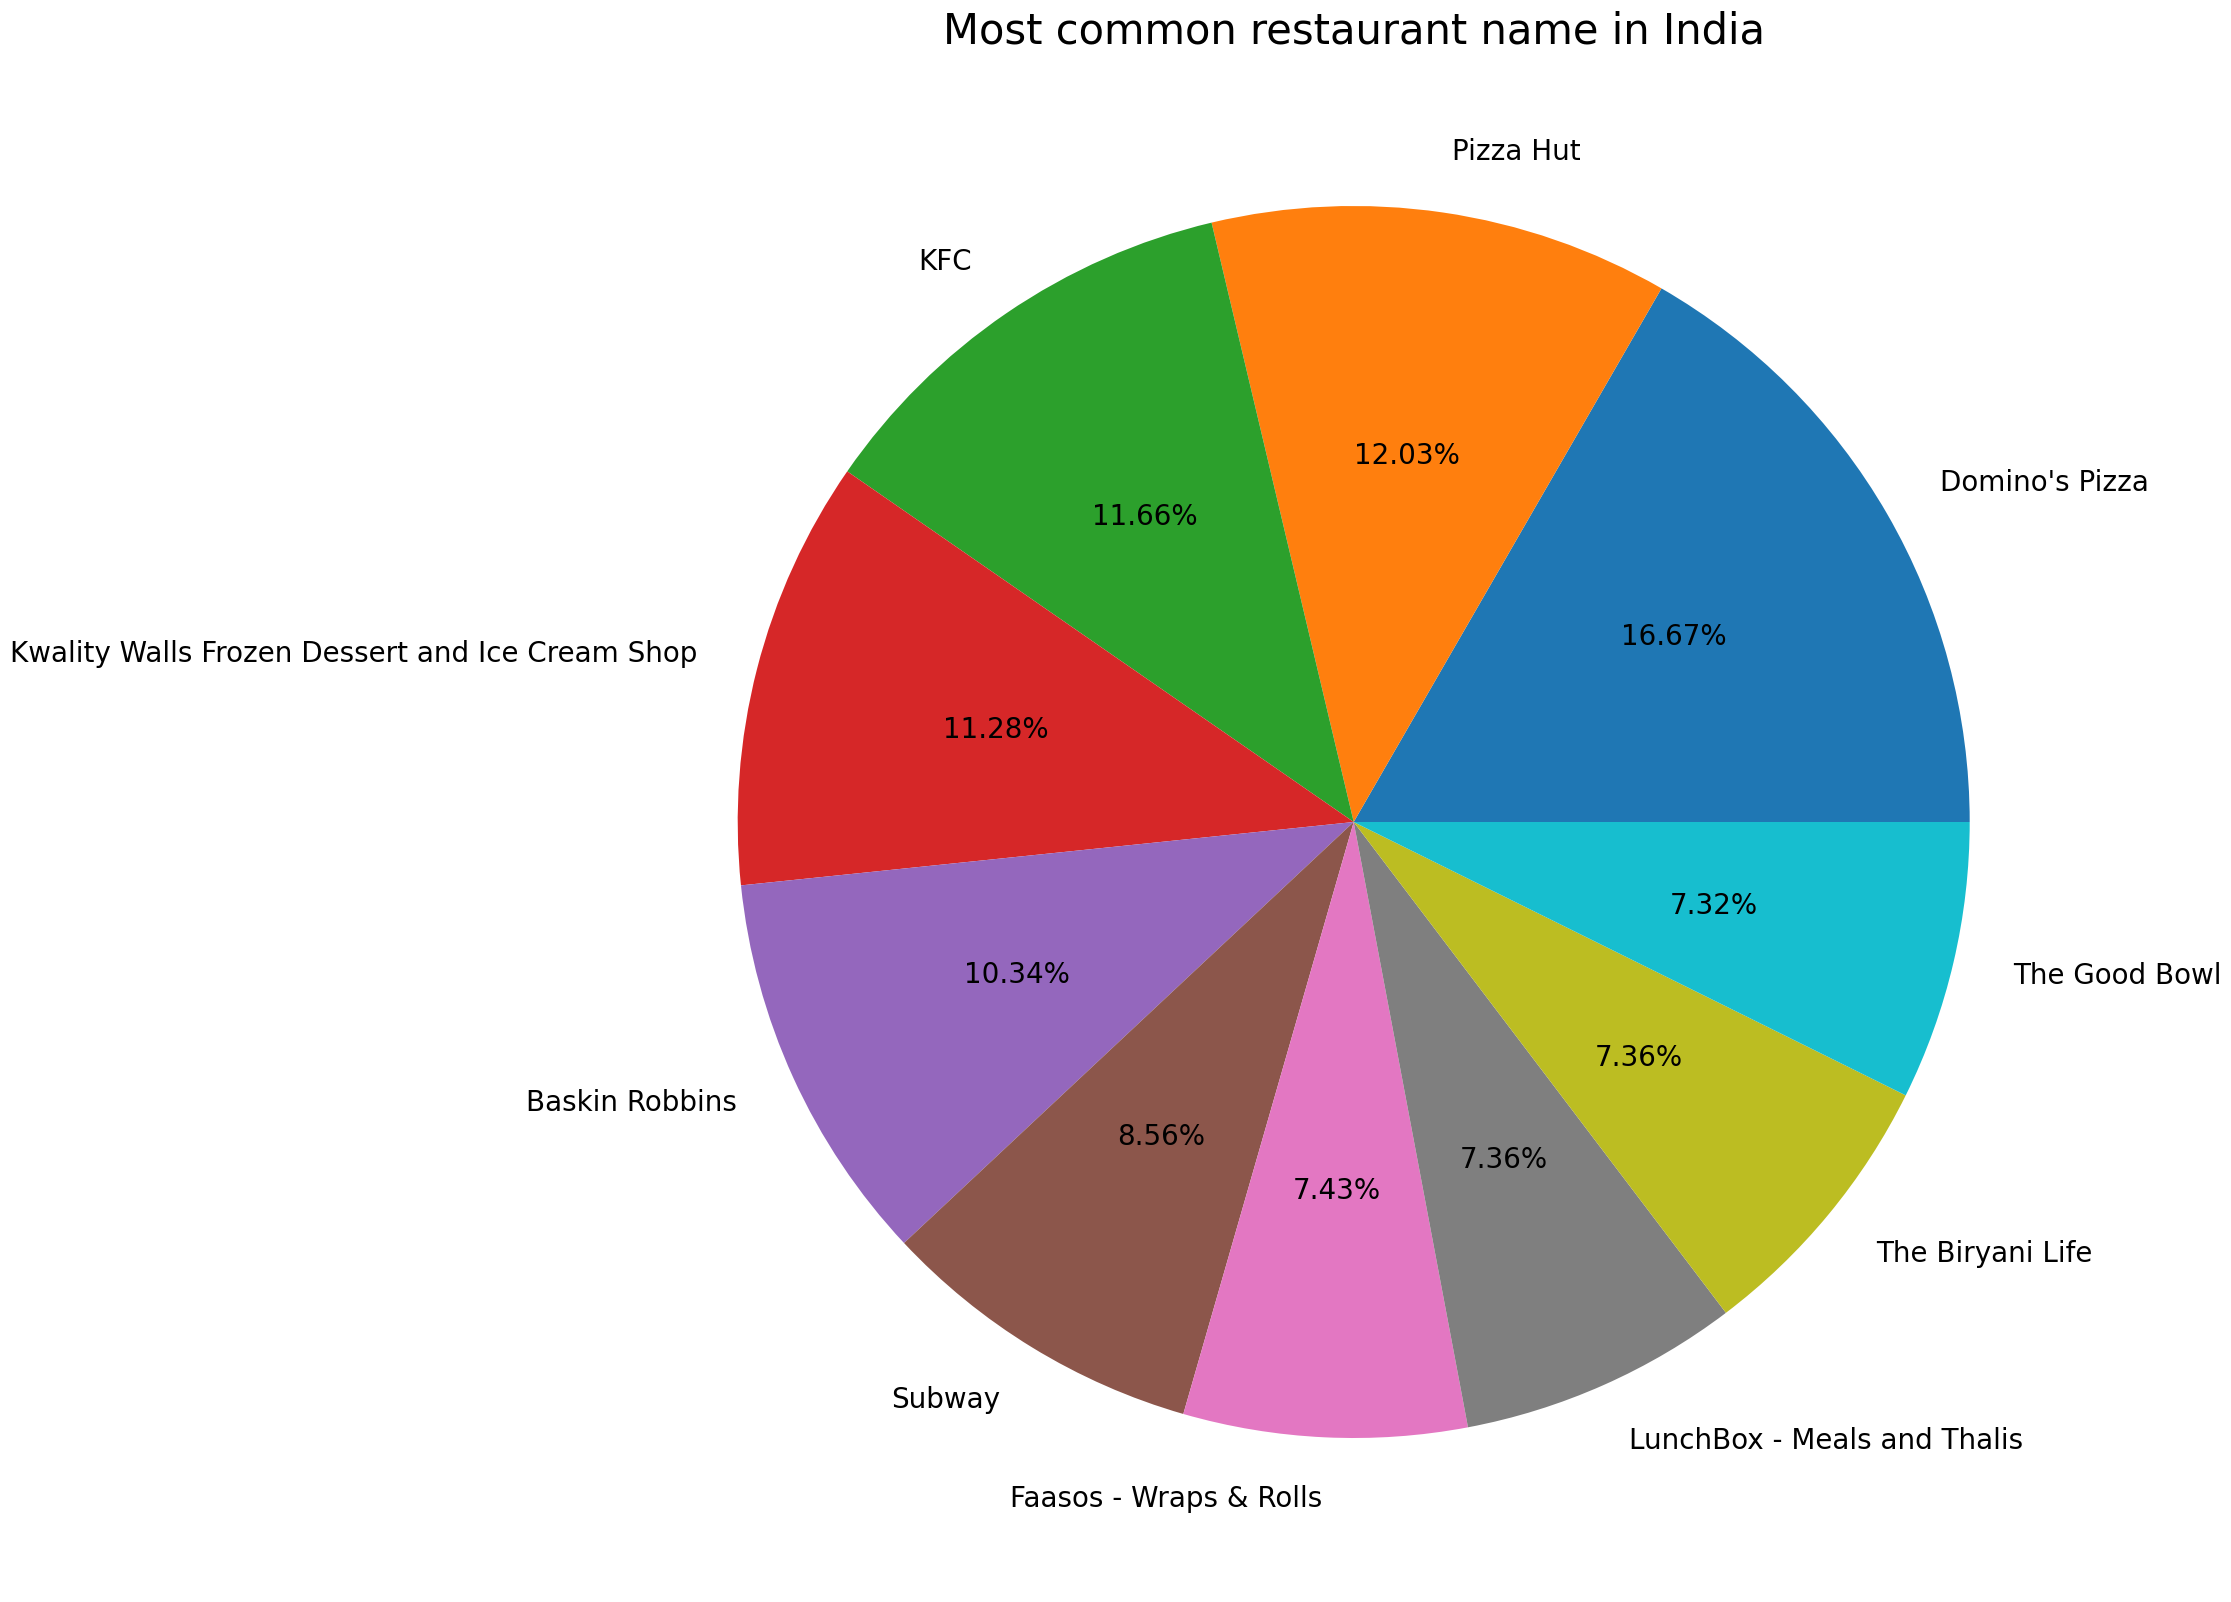

In [ ]:
data = swiggy1_df.groupby('name').size().sort_values(ascending = False).head(10)

count = data.values
names  = data.index

def format(p,count):
    value = p/100 * sum(count)

    value += 1 if float('.'+str(value).split('.')[0]) > 0.5 else 0
    return f'{int(value)}'

plt.rc('font', **{'size':20})
plt.figure(figsize=(20,20))
plt.pie(count,labels = names,autopct = '%1.2f%%')

plt.title('Most common restaurant name in India', fontsize = 30 )
plt.show()

## **Summary and Conclusion**
Based on the dataset, the most popular cuisine served throughout the Restaurants is Chinese. It has served in 36450 restaurants which are the highest in India.

More than 90% of the restaurant's cost lies between 150 to 450.

The most loved cuisines throughout the dataset are Chinese, south Indian, and north Indian. These cuisines are widely available all over India. People have given highest number of ratings counts to these cuisines.

BBK_ Chattarpur Delhi has most expensive food on average in India, the average cost is 800. On second place, we have Khan Market Delhi which has average cost around 600.

Bikaner has the highest number of restaurants listed across India which is 1666

Banjara Hills, Hyderabad has the highest number of ratings counts given by people

Domino's pizza has a maximum number of branches all over India. It has 442 branches in India.

In [ ]:
corr = swiggy1_df.corr()

<ipython-input-72-84ac82d06790>:1: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



In [ ]:
print(corr)

                    id    rating  rating_count      cost
id            1.000000 -0.497282     -0.289104 -0.096887
rating       -0.497282  1.000000      0.308525  0.060556
rating_count -0.289104  0.308525      1.000000  0.031023
cost         -0.096887  0.060556      0.031023  1.000000


In [ ]:
heatmap_fig = px.imshow(corr,text_auto=True)
heatmap_fig.update_layout(
    title='Heatmap of Correlation Matrix',
    xaxis_title='Features',
    yaxis_title='Features',
    coloraxis_colorbar=dict(title='Correlation'),
)

heatmap_fig.update_traces(
    text=corr.applymap(lambda x: f'{x:.2f}').values,
    showscale=False,
)

heatmap_fig.show()

In [ ]:
swiggy1_df

id                      name      city  rating  rating_count  \
0       567335            AB FOODS POINT    Abohar  -999.0             0   
1       531342         Janta Sweet House    Abohar     4.4            50   
2       158203         theka coffee desi    Abohar     3.8           100   
3       187912                 Singh Hut    Abohar     3.7            20   
4       543530             GRILL MASTERS    Abohar  -999.0             0   
...        ...                       ...       ...     ...           ...   
148536  553122          The Food Delight  Yavatmal  -999.0             0   
148537  562647  MAITRI FOODS & BEVERAGES  Yavatmal  -999.0             0   
148538  559435           Cafe Bella Ciao  Yavatmal  -999.0             0   
148539  418989               GRILL ZILLA  Yavatmal  -999.0             0   
148540  447770            Lazeez kitchen  Yavatmal  -999.0             0   

        cost                     cuisine          lic_no  \
0        200            Beverages,Pizzas  22122652000138   
1        200               Sweets,Bakery  12117201000112   
2        100                   Beverages  22121652000190   
3        250            Fast Food,Indian  22119652000167   
4        250  Italian-American,Fast Food  12122201000053   
...      ...                         ...             ...   
148536   200            Fast Food,Snacks  21522053000452   
148537   300                      Pizzas         license   
148538   300            Fast Food,Snacks  21522251000378   
148539   250                 Continental  21521251000241   
148540   200                      Pizzas  21521251000634   

                                                                                               link  \
0                    https://www.swiggy.com/restaurants/ab-foods-point-central-abohar-abohar-567335   
1                 https://www.swiggy.com/restaurants/janta-sweet-house-central-abohar-abohar-531342   
2                https://www.swiggy.com/restaurants/theka-coffee-desi-central-raipura-abohar-158203   
3                  https://www.swiggy.com/restaurants/singh-hut-nehru-park-main-bazar-abohar-187912   
4                     https://www.swiggy.com/restaurants/grill-masters-central-abohar-abohar-543530   
...                                                                                             ...   
148536            https://www.swiggy.com/restaurants/the-food-delight-yavatmal-city-yavatmal-553122   
148537  https://www.swiggy.com/restaurants/maitri-foods-and-beverages-yavatmal-city-yavatmal-562647   
148538             https://www.swiggy.com/restaurants/cafe-bella-ciao-yavatmal-city-yavatmal-559435   
148539                 https://www.swiggy.com/restaurants/grill-zilla-yavatmal-city-yavatmal-418989   
148540              https://www.swiggy.com/restaurants/lazeez-kitchen-yavatmal-city-yavatmal-447770   

                                                                                                          address  \
0                                        AB FOODS POINT, NEAR RISHI NARANG DENTAL CLINIC , NEAR IDBI BANK, ABOHAR   
1                                                           Janta Sweet House, Bazar No.9, Circullar Road, Abohar   
2                                                                      theka coffee desi, sahtiya sadan road city   
3                                                                 Singh Hut, CIRCULAR ROAD NEAR NEHRU PARK ABOHAR   
4                      GRILL MASTERS, ADA Heights, Abohar - Hanumangarh Rd, Raipura, Abohar, Punjab 152116, India   
...                                                                                                           ...   
148536  The Food Delight, 94MC+X35, New Singhania Nagar, SatyaNarayan Layout, Yavatmal, Maharashtra 445001, India   
148537                   MAITRI FOODS & BEVERAGES, POLIC MITRYA SOCIETY LOHARA ROAD YAVATMAL YAVATMAL MAHARASHTRA   
148538                      Cafe Bella Ciao, SHOP NO 2 NEMANI MARKET SBI SQUARE YAVATMAL

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.naive_bayes import BernoulliNB, GaussianNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.impute import SimpleImputer

# Load the Swiggy dataset
# Replace 'your_dataset.csv' with the actual dataset file path
df = pd.read_csv('/content/drive/MyDrive/swiggy.csv')

# Display basic information about the dataset
print(df.info())

# Check for missing values
print("Missing Values:")
print(df.isnull().sum())

# Drop irrelevant columns for prediction
df.drop(['id', 'name', 'link', 'address', 'menu', 'lic_no'], axis=1, inplace=True)

# Convert categorical columns using Label Encoding
le = LabelEncoder()
df['city'] = le.fit_transform(df['city'])
df['cuisine'] = le.fit_transform(df['cuisine'])

# Convert cost column to numeric
df['cost'] = df['cost'].str.replace('₹', '').str.replace(',', '').astype(float)

# Convert rating column to numeric, handling '--' values
df['rating'] = pd.to_numeric(df['rating'], errors='coerce')

df['rating_count'] = df['rating_count'].str.replace('+','').str.replace('K','000').str.replace('Too Few Ratings', '0').str.replace('ratings', '')

# Define the target variable
df['high_value_order'] = (df['cost'] > 300).astype(int)

# Select features for prediction
X = df.drop(['cost','high_value_order'], axis=1)
y = df['high_value_order']

# Impute missing values using SimpleImputer
imputer = SimpleImputer(strategy='mean')
X_imputed = pd.DataFrame(imputer.fit_transform(X), columns=X.columns)

# Feature Scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_imputed)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Initialize classifiers
classifiers = {
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'Random Forest': RandomForestClassifier(random_state=42),
    'Logistic Regression': LogisticRegression(random_state=42),
    'SVM': SVC(random_state=42),
    'Gradient Boosting': GradientBoostingClassifier(random_state=42),
    'XGBoost': XGBClassifier(random_state=42),
    'Naive Bayes (Bernoulli)': BernoulliNB(),
    'Naive Bayes (Gaussian)': GaussianNB()
}

# Train and evaluate each classifier
for clf_name, clf in classifiers.items():
    # For Naive Bayes, predict probabilities instead of class labels
    if 'Naive Bayes' in clf_name:
        y_prob = clf.fit(X_train, y_train).predict_proba(X_test)[:, 1]
        y_pred = (y_prob > 0.5).astype(int)
    else:
        # For other classifiers, predict class labels
        clf.fit(X_train, y_train)
        y_pred = clf.predict(X_test)

    # Evaluate the model
    accuracy = accuracy_score(y_test, y_pred)
    print(f'\n{clf_name} Accuracy: {accuracy:.2f}')

    # Display additional evaluation metrics
    print(classification_report(y_test, y_pred))
    print(confusion_matrix(y_test, y_pred))

# Cross-validated accuracy for Naive Bayes
naive_bayes_clfs = [classifiers['Naive Bayes (Bernoulli)'], classifiers['Naive Bayes (Gaussian)']]
for clf_name, clf in zip(['Naive Bayes (Bernoulli)', 'Naive Bayes (Gaussian)'], naive_bayes_clfs):
    scores = cross_val_score(clf, X_scaled, y, cv=5)
    print(f'{clf_name} Cross-validated Accuracy: {scores.mean():.2f} +/- {scores.std():.2f}')


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148541 entries, 0 to 148540
Data columns (total 11 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   id            148541 non-null  int64 
 1   name          148455 non-null  object
 2   city          148541 non-null  object
 3   rating        148455 non-null  object
 4   rating_count  148455 non-null  object
 5   cost          148410 non-null  object
 6   cuisine       148442 non-null  object
 7   lic_no        148312 non-null  object
 8   link          148541 non-null  object
 9   address       148455 non-null  object
 10  menu          148541 non-null  object
dtypes: int64(1), object(10)
memory usage: 12.5+ MB
None
Missing Values:
id                0
name             86
city              0
rating           86
rating_count     86
cost            131
cuisine          99
lic_no          229
link              0
address          86
menu              0
dtype: int64


<ipython-input-76-ce7e8f336945>:38: FutureWarning:

The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.




Decision Tree Accuracy: 0.74
              precision    recall  f1-score   support

           0       0.81      0.86      0.83     22813
           1       0.42      0.34      0.38      6896

    accuracy                           0.74     29709
   macro avg       0.62      0.60      0.60     29709
weighted avg       0.72      0.74      0.73     29709

[[19561  3252]
 [ 4550  2346]]

Random Forest Accuracy: 0.76
              precision    recall  f1-score   support

           0       0.81      0.90      0.85     22813
           1       0.47      0.30      0.37      6896

    accuracy                           0.76     29709
   macro avg       0.64      0.60      0.61     29709
weighted avg       0.73      0.76      0.74     29709

[[20514  2299]
 [ 4833  2063]]

Logistic Regression Accuracy: 0.77
              precision    recall  f1-score   support

           0       0.77      1.00      0.87     22813
           1       0.47      0.00      0.00      6896

    accuracy            

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



              precision    recall  f1-score   support

           0       0.77      1.00      0.87     22813
           1       0.00      0.00      0.00      6896

    accuracy                           0.77     29709
   macro avg       0.38      0.50      0.43     29709
weighted avg       0.59      0.77      0.67     29709

[[22813     0]
 [ 6896     0]]

Naive Bayes (Gaussian) Accuracy: 0.76
              precision    recall  f1-score   support

           0       0.77      0.98      0.86     22813
           1       0.38      0.03      0.06      6896

    accuracy                           0.76     29709
   macro avg       0.57      0.51      0.46     29709
weighted avg       0.68      0.76      0.68     29709

[[22453   360]
 [ 6677   219]]
Naive Bayes (Bernoulli) Cross-validated Accuracy: 0.77 +/- 0.00
Naive Bayes (Gaussian) Cross-validated Accuracy: 0.76 +/- 0.00


In [ ]:
unique_cuisine_counts = df['cuisine'].value_counts()
print(unique_cuisine_counts)


1517    6471
1020    6414
537     5051
1499    4775
1039    4374
        ... 
2120       1
947        1
964        1
1299       1
249        1
Name: cuisine, Length: 2133, dtype: int64


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.naive_bayes import BernoulliNB, GaussianNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.impute import SimpleImputer

# Load the Swiggy dataset
# Replace 'your_dataset.csv' with the actual dataset file path
df = pd.read_csv('/content/drive/MyDrive/swiggy.csv')

# Display basic information about the dataset
print(df.info())

# Check for missing values
print("Missing Values:")
print(df.isnull().sum())
df.dropna(inplace=True)

# Drop irrelevant columns for prediction
df.drop(['id', 'name', 'link', 'address', 'menu', 'lic_no'], axis=1, inplace=True)

# Convert categorical columns using Label Encoding
le = LabelEncoder()
df['city'] = le.fit_transform(df['city'])
df['cuisine'] = le.fit_transform(df['cuisine'])

# Convert cost column to numeric
df['cost'] = df['cost'].str.replace('₹', '').str.replace(',', '').astype(float)

# Convert rating column to numeric, handling '--' values
df['rating'] = pd.to_numeric(df['rating'], errors='coerce')

df['rating_count'] = df['rating_count'].str.replace('+', '').str.replace('K', '000').str.replace(
    'Too Few Ratings', '0').str.replace('ratings', '')

# Remove data outside the bottom 5% and top 5% cost
bottom_threshold = df['cost'].quantile(0.05)
top_threshold = df['cost'].quantile(0.95)
df = df[(df['cost'] >= bottom_threshold) & (df['cost'] <= top_threshold)]

# Define the target variable
threshold = df['cost'].quantile(0.75)
df['high_value_order'] = (df['cost'] > threshold).astype(int)

# Select features for prediction
X = df.drop(['cost', 'high_value_order','cuisine'], axis=1)
y = df['high_value_order']

# Impute missing values using SimpleImputer
imputer = SimpleImputer(strategy='mean')
X_imputed = pd.DataFrame(imputer.fit_transform(X), columns=X.columns)

# Feature Scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_imputed)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Initialize classifiers
classifiers = {
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'Random Forest': RandomForestClassifier(random_state=42),
    'Logistic Regression': LogisticRegression(random_state=42),
    # 'SVM': SVC(random_state=42),
    'Gradient Boosting': GradientBoostingClassifier(random_state=42),
    'XGBoost': XGBClassifier(random_state=42),
    'Naive Bayes (Bernoulli)': BernoulliNB(),
    'Naive Bayes (Gaussian)': GaussianNB()
}

# Train and evaluate each classifier
for clf_name, clf in classifiers.items():
    # For Naive Bayes, predict probabilities instead of class labels
    if 'Naive Bayes' in clf_name:
        y_prob = clf.fit(X_train, y_train).predict_proba(X_test)[:, 1]
        y_pred = (y_prob > 0.5).astype(int)
    else:
        # For other classifiers, predict class labels
        clf.fit(X_train, y_train)
        y_pred = clf.predict(X_test)

    # Evaluate the model
    accuracy = accuracy_score(y_test, y_pred)
    print(f'\n{clf_name} Accuracy: {accuracy:.2f}')

    # Display additional evaluation metrics
    print(classification_report(y_test, y_pred))
    print(confusion_matrix(y_test, y_pred))

# Cross-validated accuracy for Naive Bayes
naive_bayes_clfs = [classifiers['Naive Bayes (Bernoulli)'], classifiers['Naive Bayes (Gaussian)']]
for clf_name, clf in zip(['Naive Bayes (Bernoulli)', 'Naive Bayes (Gaussian)'], naive_bayes_clfs):
    scores = cross_val_score(clf, X_scaled, y, cv=5)
    print(f'{clf_name} Cross-validated Accuracy: {scores.mean():.2f} +/- {scores.std():.2f}')


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148541 entries, 0 to 148540
Data columns (total 11 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   id            148541 non-null  int64 
 1   name          148455 non-null  object
 2   city          148541 non-null  object
 3   rating        148455 non-null  object
 4   rating_count  148455 non-null  object
 5   cost          148410 non-null  object
 6   cuisine       148442 non-null  object
 7   lic_no        148312 non-null  object
 8   link          148541 non-null  object
 9   address       148455 non-null  object
 10  menu          148541 non-null  object
dtypes: int64(1), object(10)
memory usage: 12.5+ MB
None
Missing Values:
id                0
name             86
city              0
rating           86
rating_count     86
cost            131
cuisine          99
lic_no          229
link              0
address          86
menu              0
dtype: int64


<ipython-input-100-c31dfcaee978>:39: FutureWarning:

The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.

<ipython-input-100-c31dfcaee978>:49: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy




Decision Tree Accuracy: 0.78
              precision    recall  f1-score   support

           0       0.81      0.95      0.88     22550
           1       0.30      0.09      0.14      5351

    accuracy                           0.78     27901
   macro avg       0.56      0.52      0.51     27901
weighted avg       0.72      0.78      0.74     27901

[[21419  1131]
 [ 4873   478]]

Random Forest Accuracy: 0.78
              precision    recall  f1-score   support

           0       0.82      0.95      0.88     22550
           1       0.31      0.10      0.15      5351

    accuracy                           0.78     27901
   macro avg       0.56      0.52      0.51     27901
weighted avg       0.72      0.78      0.74     27901

[[21316  1234]
 [ 4805   546]]

Logistic Regression Accuracy: 0.81
              precision    recall  f1-score   support

           0       0.81      1.00      0.89     22550
           1       0.33      0.00      0.00      5351

    accuracy            

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



              precision    recall  f1-score   support

           0       0.81      0.98      0.89     22550
           1       0.32      0.04      0.06      5351

    accuracy                           0.80     27901
   macro avg       0.57      0.51      0.48     27901
weighted avg       0.72      0.80      0.73     27901

[[22155   395]
 [ 5162   189]]
Naive Bayes (Bernoulli) Cross-validated Accuracy: 0.81 +/- 0.00
Naive Bayes (Gaussian) Cross-validated Accuracy: 0.80 +/- 0.01


In [ ]:
import plotly.express as px

In [ ]:
# Boxplot for 'cost' with a darker color
fig_box = px.box(df, y='cost', title='Boxplot for Cost', color_discrete_sequence=['#2E2E2E'])
fig_box.show()


In [ ]:
df2 = df.copy()
df2 = df.drop(['cuisine'], axis=1)
heatmap_fig = px.imshow(df2.corr(),text_auto=True)
heatmap_fig.update_layout(
    title='Heatmap of Correlation Matrix',
    xaxis_title='Features',
    yaxis_title='Features',
    coloraxis_colorbar=dict(title='Correlation'),
)

heatmap_fig.update_traces(
    text=corr.applymap(lambda x: f'{x:.2f}').values,
    showscale=False,
)

heatmap_fig.show()

<ipython-input-103-3aab43aad915>:3: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



In [ ]:
df2.corr()

<ipython-input-104-e0c6714eb3b3>:1: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



city    rating      cost  high_value_order
city              1.000000  0.009748  0.024410          0.015056
rating            0.009748  1.000000  0.080808          0.089571
cost              0.024410  0.080808  1.000000          0.789143
high_value_order  0.015056  0.089571  0.789143          1.000000

In [ ]:
import plotly.express as px

# Calculate correlation matrix
correlation_matrix = df.corr()

# Create heatmap for the correlation matrix
heatmap_fig = px.imshow(correlation_matrix,
                        labels=dict(x='Features', y='Features', color='Correlation'),
                        x=correlation_matrix.index,
                        y=correlation_matrix.columns,
                        color_continuous_scale='plasma',
                        title='Heatmap of Correlation Matrix')

# Update layout
heatmap_fig.update_layout(
    xaxis_title='Features',
    yaxis_title='Features',
    coloraxis_colorbar=dict(title='Correlation'),
)

# Update traces for annotations
for i, feature in enumerate(correlation_matrix.index):
    for j, other_feature in enumerate(correlation_matrix.columns):
        corr_value = correlation_matrix.iloc[i, j]
        heatmap_fig.add_annotation(
            x=feature,
            y=other_feature,
            text=f'{corr_value:.2f}',
            showarrow=False,
            font=dict(color='Blue' if abs(corr_value) > 0.5 else 'red')
        )

heatmap_fig.show()


<ipython-input-99-b4bfb916bd4e>:4: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.naive_bayes import BernoulliNB, GaussianNB
from sklearn.neural_network import MLPClassifier  # Added for Neural Network
from sklearn.ensemble import VotingClassifier  # Added for Ensemble
from sklearn.neighbors import KNeighborsClassifier  # Added for KNN
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.impute import SimpleImputer

# Load the Swiggy dataset
# Replace 'your_dataset.csv' with the actual dataset file path
df = pd.read_csv('/content/drive/MyDrive/swiggy.csv')

# Display basic information about the dataset
print(df.info())

# Check for missing values
print("Missing Values:")
print(df.isnull().sum())
df.dropna(inplace=True)

# Drop irrelevant columns for prediction
df.drop(['id', 'name', 'link', 'address', 'menu', 'lic_no'], axis=1, inplace=True)

# Convert categorical columns using Label Encoding
le = LabelEncoder()
df['city'] = le.fit_transform(df['city'])
df['cuisine'] = le.fit_transform(df['cuisine'])

# Convert cost column to numeric
df['cost'] = df['cost'].str.replace('₹', '').str.replace(',', '').astype(float)

# Convert rating column to numeric, handling '--' values
df['rating'] = pd.to_numeric(df['rating'], errors='coerce')

df['rating_count'] = df['rating_count'].str.replace('+', '').str.replace('K', '000').str.replace(
    'Too Few Ratings', '0').str.replace('ratings', '')

# Remove data outside the bottom 5% and top 5% cost
bottom_threshold = df['cost'].quantile(0.05)
top_threshold = df['cost'].quantile(0.95)
df = df[(df['cost'] >= bottom_threshold) & (df['cost'] <= top_threshold)]

# Define the target variable
threshold = df['cost'].quantile(0.75)
df['high_value_order'] = (df['cost'] > threshold).astype(int)

# Select features for prediction
X = df.drop(['cost', 'high_value_order'], axis=1)
y = df['high_value_order']

# Impute missing values using SimpleImputer
imputer = SimpleImputer(strategy='mean')
X_imputed = pd.DataFrame(imputer.fit_transform(X), columns=X.columns)

# Feature Scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_imputed)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Initialize classifiers
classifiers = {
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'Random Forest': RandomForestClassifier(random_state=42),
    'Logistic Regression': LogisticRegression(random_state=42),
    # 'SVM': SVC(random_state=42),
    'Gradient Boosting': GradientBoostingClassifier(random_state=42),
    'XGBoost': XGBClassifier(random_state=42),
    'Naive Bayes (Bernoulli)': BernoulliNB(),
    'Naive Bayes (Gaussian)': GaussianNB(),
    'Neural Network': MLPClassifier(random_state=42),  # Added Neural Network
    'Ensemble (Voting)': VotingClassifier(
        [('Decision Tree', DecisionTreeClassifier(random_state=42)),
         ('Random Forest', RandomForestClassifier(random_state=42)),
         ('Logistic Regression', LogisticRegression(random_state=42)),
         ('Gradient Boosting', GradientBoostingClassifier(random_state=42)),
         ('XGBoost', XGBClassifier(random_state=42)),
         ('Naive Bayes (Bernoulli)', BernoulliNB()),
         ('Naive Bayes (Gaussian)', GaussianNB()),
         ('Neural Network', MLPClassifier(random_state=42))],
        voting='soft'
    ),  # Added Ensemble (Voting)
    'K-Nearest Neighbors': KNeighborsClassifier()  # Added KNN
}

# Train and evaluate each classifier
for clf_name, clf in classifiers.items():
    # For Naive Bayes, predict probabilities instead of class labels
    if 'Naive Bayes' in clf_name or clf_name == 'Neural Network':
        y_prob = clf.fit(X_train, y_train).predict_proba(X_test)[:, 1]
        y_pred = (y_prob > 0.5).astype(int)
    else:
        # For other classifiers, predict class labels
        clf.fit(X_train, y_train)
        y_pred = clf.predict(X_test)

    # Evaluate the model
    accuracy = accuracy_score(y_test, y_pred)
    print(f'\n{clf_name} Accuracy: {accuracy:.2f}')

    # Display additional evaluation metrics
    print(classification_report(y_test, y_pred))
    print(confusion_matrix(y_test, y_pred))

# Cross-validated accuracy for Naive Bayes and Neural Network
naive_bayes_clfs = [classifiers['Naive Bayes (Bernoulli)'], classifiers['Naive Bayes (Gaussian)']]
neural_network_clf = classifiers['Neural Network']

for clf_name, clf in zip(['Naive Bayes (Bernoulli)', 'Naive Bayes (Gaussian)'], naive_bayes_clfs):
    scores = cross_val_score(clf, X_scaled, y, cv=5)
    print(f'{clf_name} Cross-validated Accuracy: {scores.mean():.2f} +/- {scores.std():.2f}')

neural_network_scores = cross_val_score(neural_network_clf, X_scaled, y, cv=5)
print(f'Neural Network Cross-validated Accuracy: {neural_network_scores.mean():.2f} +/- {neural_network_scores.std():.2f}')


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148541 entries, 0 to 148540
Data columns (total 11 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   id            148541 non-null  int64 
 1   name          148455 non-null  object
 2   city          148541 non-null  object
 3   rating        148455 non-null  object
 4   rating_count  148455 non-null  object
 5   cost          148410 non-null  object
 6   cuisine       148442 non-null  object
 7   lic_no        148312 non-null  object
 8   link          148541 non-null  object
 9   address       148455 non-null  object
 10  menu          148541 non-null  object
dtypes: int64(1), object(10)
memory usage: 12.5+ MB
None
Missing Values:
id                0
name             86
city              0
rating           86
rating_count     86
cost            131
cuisine          99
lic_no          229
link              0
address          86
menu              0
dtype: int64


<ipython-input-32-b21e0aeabddb>:42: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df['rating_count'] = df['rating_count'].str.replace('+', '').str.replace('K', '000').str.replace(
<ipython-input-32-b21e0aeabddb>:52: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['high_value_order'] = (df['cost'] > threshold).astype(int)



Decision Tree Accuracy: 0.76
              precision    recall  f1-score   support

           0       0.83      0.87      0.85     22550
           1       0.33      0.26      0.29      5351

    accuracy                           0.76     27901
   macro avg       0.58      0.57      0.57     27901
weighted avg       0.74      0.76      0.75     27901

[[19696  2854]
 [ 3938  1413]]

Random Forest Accuracy: 0.79
              precision    recall  f1-score   support

           0       0.83      0.92      0.87     22550
           1       0.39      0.22      0.28      5351

    accuracy                           0.79     27901
   macro avg       0.61      0.57      0.58     27901
weighted avg       0.75      0.79      0.76     27901

[[20768  1782]
 [ 4194  1157]]

Logistic Regression Accuracy: 0.81
              precision    recall  f1-score   support

           0       0.81      1.00      0.89     22550
           1       0.33      0.00      0.00      5351

    accuracy            

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))



Naive Bayes (Gaussian) Accuracy: 0.80
              precision    recall  f1-score   support

           0       0.81      0.98      0.89     22550
           1       0.32      0.04      0.06      5351

    accuracy                           0.80     27901
   macro avg       0.57      0.51      0.48     27901
weighted avg       0.72      0.80      0.73     27901

[[22155   395]
 [ 5162   189]]

Neural Network Accuracy: 0.81
              precision    recall  f1-score   support

           0       0.81      1.00      0.89     22550
           1       0.62      0.02      0.05      5351

    accuracy                           0.81     27901
   macro avg       0.71      0.51      0.47     27901
weighted avg       0.77      0.81      0.73     27901

[[22471    79]
 [ 5224   127]]

Ensemble (Voting) Accuracy: 0.82
              precision    recall  f1-score   support

           0       0.82      1.00      0.90     22550
           1       0.78      0.05      0.10      5351

    accuracy    

In [ ]:
# Train and evaluate each classifier
for clf_name, clf in classifiers.items():
    # For Naive Bayes, predict probabilities instead of class labels
    if 'Naive Bayes' in clf_name or clf_name == 'Neural Network':
        y_prob_train = clf.fit(X_train, y_train).predict_proba(X_train)[:, 1]
        y_pred_train = (y_prob_train > 0.5).astype(int)

        y_prob_test = clf.predict_proba(X_test)[:, 1]
        y_pred_test = (y_prob_test > 0.5).astype(int)
    else:
        # For other classifiers, predict class labels
        clf.fit(X_train, y_train)
        y_pred_train = clf.predict(X_train)
        y_pred_test = clf.predict(X_test)

    # Evaluate the model on training set
    accuracy_train = accuracy_score(y_train, y_pred_train)
    print(f'\n{clf_name} Training Accuracy: {accuracy_train:.2%}')

    # Display additional evaluation metrics for training set
    print("Training Set Metrics:")
    print(classification_report(y_train, y_pred_train))
    print(confusion_matrix(y_train, y_pred_train))

    # Evaluate the model on testing set
    accuracy_test = accuracy_score(y_test, y_pred_test)
    print(f'\n{clf_name} Testing Accuracy: {accuracy_test:.2%}')

    # Display additional evaluation metrics for testing set
    print("\nTesting Set Metrics:")
    print(classification_report(y_test, y_pred_test))
    print(confusion_matrix(y_test, y_pred_test))



Decision Tree Training Accuracy: 94.18%
Training Set Metrics:
              precision    recall  f1-score   support

           0       0.94      0.99      0.97     90159
           1       0.96      0.72      0.83     21444

    accuracy                           0.94    111603
   macro avg       0.95      0.86      0.90    111603
weighted avg       0.94      0.94      0.94    111603

[[89591   568]
 [ 5925 15519]]

Decision Tree Testing Accuracy: 75.66%

Testing Set Metrics:
              precision    recall  f1-score   support

           0       0.83      0.87      0.85     22550
           1       0.33      0.26      0.29      5351

    accuracy                           0.76     27901
   macro avg       0.58      0.57      0.57     27901
weighted avg       0.74      0.76      0.75     27901

[[19696  2854]
 [ 3938  1413]]

Random Forest Training Accuracy: 94.18%
Training Set Metrics:
              precision    recall  f1-score   support

           0       0.94      0.99      0.

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classif

              precision    recall  f1-score   support

           0       0.81      1.00      0.89     90159
           1       0.00      0.00      0.00     21444

    accuracy                           0.81    111603
   macro avg       0.40      0.50      0.45    111603
weighted avg       0.65      0.81      0.72    111603

[[90159     0]
 [21444     0]]

Naive Bayes (Bernoulli) Testing Accuracy: 80.82%

Testing Set Metrics:
              precision    recall  f1-score   support

           0       0.81      1.00      0.89     22550
           1       0.00      0.00      0.00      5351

    accuracy                           0.81     27901
   macro avg       0.40      0.50      0.45     27901
weighted avg       0.65      0.81      0.72     27901

[[22550     0]
 [ 5351     0]]

Naive Bayes (Gaussian) Training Accuracy: 80.09%
Training Set Metrics:
              precision    recall  f1-score   support

           0       0.81      0.98      0.89     90159
           1       0.32      0.

In [ ]:
import pandas as pd
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, VotingClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.naive_bayes import BernoulliNB, GaussianNB
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

# Load the Swiggy dataset
df = pd.read_csv('/content/drive/MyDrive/swiggy.csv')

# Drop irrelevant columns for prediction
df.drop(['id', 'name', 'link', 'address', 'menu', 'lic_no'], axis=1, inplace=True)

# Convert categorical columns using Label Encoding
le = LabelEncoder()
df['city'] = le.fit_transform(df['city'])
df['cuisine'] = le.fit_transform(df['cuisine'])

# Convert cost column to numeric
df['cost'] = df['cost'].str.replace('₹', '').str.replace(',', '').astype(float)

# Convert rating column to numeric, handling '--' values
df['rating'] = pd.to_numeric(df['rating'], errors='coerce')
df['rating_count'] = df['rating_count'].str.replace('+', '').str.replace('K', '000').str.replace(
    'Too Few Ratings', '0').str.replace('ratings', '')

# Remove data outside the bottom 5% and top 5% cost
bottom_threshold = df['cost'].quantile(0.05)
top_threshold = df['cost'].quantile(0.95)
df = df[(df['cost'] >= bottom_threshold) & (df['cost'] <= top_threshold)]

# Define the target variable
threshold = df['cost'].quantile(0.75)
df['high_value_order'] = (df['cost'] > threshold).astype(int)

# Select features for prediction
X = df.drop(['cost', 'high_value_order'], axis=1)
y = df['high_value_order']

# Impute missing values using SimpleImputer
imputer = SimpleImputer(strategy='mean')
X_imputed = pd.DataFrame(imputer.fit_transform(X), columns=X.columns)

# Feature Scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_imputed)

# Oversample the minority class using SMOTE
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_scaled, y)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

# Initialize classifiers
classifiers = {
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'Random Forest': RandomForestClassifier(random_state=42),
    'Logistic Regression': LogisticRegression(random_state=42),
    'Gradient Boosting': GradientBoostingClassifier(random_state=42),
    'XGBoost': XGBClassifier(random_state=42),
    # 'Naive Bayes (Bernoulli)': BernoulliNB(),
    # 'Naive Bayes (Gaussian)': GaussianNB(),
    'Neural Network': MLPClassifier(random_state=42),
    # 'Ensemble (Voting)': VotingClassifier(
    #     [('Decision Tree', DecisionTreeClassifier(random_state=42)),
    #      ('Random Forest', RandomForestClassifier(random_state=42)),
    #      ('Logistic Regression', LogisticRegression(random_state=42)),
    #      ('Gradient Boosting', GradientBoostingClassifier(random_state=42)),
    #      ('XGBoost', XGBClassifier(random_state=42)),
    #      ('Naive Bayes (Bernoulli)', BernoulliNB()),
    #      ('Naive Bayes (Gaussian)', GaussianNB()),
    #      ('Neural Network', MLPClassifier(random_state=42))],
    #     voting='soft'
    # ),
    # 'K-Nearest Neighbors': KNeighborsClassifier()
}

# Train and evaluate each classifier
for clf_name, clf in classifiers.items():
    # For Naive Bayes, predict probabilities instead of class labels
    if 'Naive Bayes' in clf_name or clf_name == 'Neural Network':
        y_prob = clf.fit(X_train, y_train).predict_proba(X_test)[:, 1]
        y_pred = (y_prob > 0.5).astype(int)
    else:
        # For other classifiers, predict class labels
        clf.fit(X_train, y_train)
        y_pred = clf.predict(X_test)

    # Evaluate the model
    accuracy = accuracy_score(y_test, y_pred)
    print(f'\n{clf_name} Accuracy: {accuracy:.2f}')

    # Display additional evaluation metrics
    print(classification_report(y_test, y_pred))
    print(confusion_matrix(y_test, y_pred))


<ipython-input-30-c90e8e87fbaf>:31: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df['rating_count'] = df['rating_count'].str.replace('+', '').str.replace('K', '000').str.replace(



Decision Tree Accuracy: 0.79
              precision    recall  f1-score   support

           0       0.78      0.81      0.79     22298
           1       0.80      0.77      0.79     22833

    accuracy                           0.79     45131
   macro avg       0.79      0.79      0.79     45131
weighted avg       0.79      0.79      0.79     45131

[[18020  4278]
 [ 5223 17610]]

Random Forest Accuracy: 0.80
              precision    recall  f1-score   support

           0       0.79      0.82      0.81     22298
           1       0.82      0.79      0.80     22833

    accuracy                           0.80     45131
   macro avg       0.80      0.80      0.80     45131
weighted avg       0.80      0.80      0.80     45131

[[18232  4066]
 [ 4764 18069]]

Logistic Regression Accuracy: 0.54
              precision    recall  f1-score   support

           0       0.53      0.67      0.59     22298
           1       0.56      0.41      0.48     22833

    accuracy            

<ipython-input-7-674279ad0997>:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['high_value_order'] = (df['cost'] > threshold).astype(int)


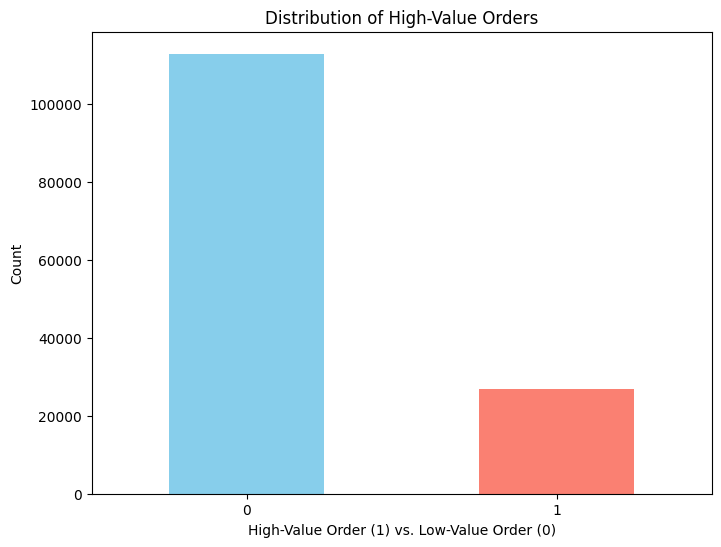

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the Swiggy dataset
df = pd.read_csv('/content/drive/MyDrive/swiggy.csv')

# Drop irrelevant columns for prediction
df.drop(['id', 'name', 'link', 'address', 'menu', 'lic_no'], axis=1, inplace=True)

# Convert cost column to numeric
df['cost'] = df['cost'].str.replace('₹', '').str.replace(',', '').astype(float)

# Remove data outside the bottom 5% and top 5% cost
bottom_threshold = df['cost'].quantile(0.05)
top_threshold = df['cost'].quantile(0.95)
df = df[(df['cost'] >= bottom_threshold) & (df['cost'] <= top_threshold)]

# Define the target variable
threshold = df['cost'].quantile(0.70)
df['high_value_order'] = (df['cost'] > threshold).astype(int)

# Plotting
plt.figure(figsize=(8, 6))
df['high_value_order'].value_counts().sort_index().plot(kind='bar', color=['skyblue', 'salmon'])
plt.title('Distribution of High-Value Orders')
plt.xlabel('High-Value Order (1) vs. Low-Value Order (0)')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()


<ipython-input-25-13241e45dee8>:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['high_value_order'] = (df['cost'] > threshold).astype(int)


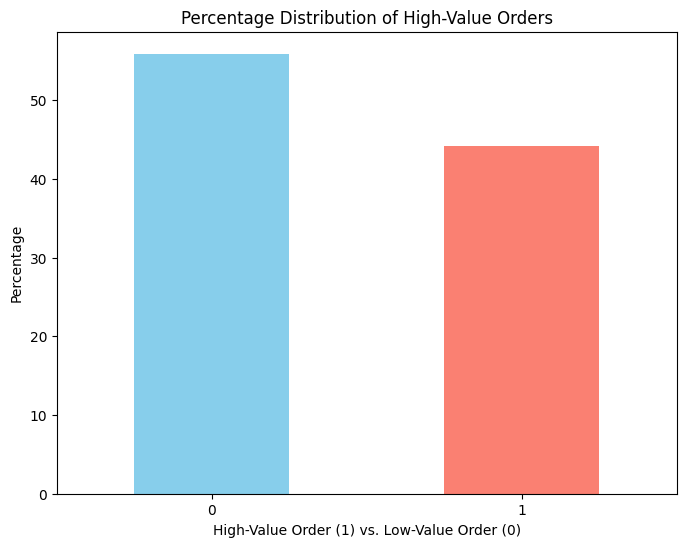

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the Swiggy dataset
df = pd.read_csv('/content/drive/MyDrive/swiggy.csv')

# Drop irrelevant columns for prediction
df.drop(['id', 'name', 'link', 'address', 'menu', 'lic_no'], axis=1, inplace=True)

# Convert cost column to numeric
df['cost'] = df['cost'].str.replace('₹', '').str.replace(',', '').astype(float)

# Remove data outside the bottom 5% and top 5% cost
bottom_threshold = df['cost'].quantile(0.10)
top_threshold = df['cost'].quantile(0.95)
df = df[(df['cost'] >= bottom_threshold) & (df['cost'] <= top_threshold)]

# Define the target variable
threshold = df['cost'].quantile(0.55)
df['high_value_order'] = (df['cost'] > threshold).astype(int)

# Calculate percentages
percentage_counts = df['high_value_order'].value_counts(normalize=True) * 100

# Plotting
plt.figure(figsize=(8, 6))
percentage_counts.sort_index().plot(kind='bar', color=['skyblue', 'salmon'])
plt.title('Percentage Distribution of High-Value Orders')
plt.xlabel('High-Value Order (1) vs. Low-Value Order (0)')
plt.ylabel('Percentage')
plt.xticks(rotation=0)
plt.show()


In [ ]:
percentage_counts

0    55.884698
1    44.115302
Name: high_value_order, dtype: float64

In [ ]:
import pandas as pd
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, VotingClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.naive_bayes import BernoulliNB, GaussianNB
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

# Load the Swiggy dataset
df = pd.read_csv('/content/drive/MyDrive/swiggy.csv')

# Drop irrelevant columns for prediction
df.drop(['id', 'name', 'link', 'address', 'menu', 'lic_no'], axis=1, inplace=True)

# Convert categorical columns using Label Encoding
le = LabelEncoder()
df['city'] = le.fit_transform(df['city'])
df['cuisine'] = le.fit_transform(df['cuisine'])

# Convert cost column to numeric
df['cost'] = df['cost'].str.replace('₹', '').str.replace(',', '').astype(float)

# Convert rating column to numeric, handling '--' values
df['rating'] = pd.to_numeric(df['rating'], errors='coerce')
df['rating_count'] = df['rating_count'].str.replace('+', '').str.replace('K', '000').str.replace(
    'Too Few Ratings', '0').str.replace('ratings', '')

# Remove data outside the bottom 5% and top 5% cost
bottom_threshold = df['cost'].quantile(0.05)
top_threshold = df['cost'].quantile(0.95)
df = df[(df['cost'] >= bottom_threshold) & (df['cost'] <= top_threshold)]

# Define the target variable
threshold = df['cost'].quantile(0.75)
df['high_value_order'] = (df['cost'] > threshold).astype(int)

# Select features for prediction
X = df.drop(['cost', 'high_value_order'], axis=1)
y = df['high_value_order']

# Impute missing values using SimpleImputer
imputer = SimpleImputer(strategy='mean')
X_imputed = pd.DataFrame(imputer.fit_transform(X), columns=X.columns)

# Feature Scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_imputed)

# Oversample the minority class using SMOTE
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_scaled, y)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

# Define hyperparameters for selected classifiers
param_grid = {
    'Decision Tree': {'max_depth': [None, 10, 20, 30],
                      'min_samples_split': [2, 5, 10],
                      'min_samples_leaf': [1, 2, 4]},

    'Random Forest': {'n_estimators': [50, 100, 200],
                      'max_depth': [None, 10, 20, 30],
                      'min_samples_split': [2, 5, 10],
                      'min_samples_leaf': [1, 2, 4]},

    'Logistic Regression': {'C': [0.001, 0.01, 0.1, 1, 10, 100],
                            'penalty': ['l1', 'l2', 'elasticnet', 'none']},

    'Gradient Boosting': {'n_estimators': [50, 100, 200],
                          'learning_rate': [0.01, 0.1, 0.2],
                          'max_depth': [3, 5, 7]},

    'XGBoost': {'n_estimators': [50, 100, 200],
                'learning_rate': [0.01, 0.1, 0.2],
                'max_depth': [3, 5, 7]},

    'Neural Network': {'hidden_layer_sizes': [(50,), (100,), (50, 50), (100, 50)],
                       'activation': ['relu', 'logistic', 'tanh'],
                       'alpha': [0.0001, 0.001, 0.01]},

    'K-Nearest Neighbors': {'n_neighbors': [3, 5, 7],
                            'weights': ['uniform', 'distance']}
}

# Initialize classifiers with default hyperparameters
classifiers = {
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'Random Forest': RandomForestClassifier(random_state=42),
    'Logistic Regression': LogisticRegression(random_state=42),
    'Gradient Boosting': GradientBoostingClassifier(random_state=42),
    'XGBoost': XGBClassifier(random_state=42),
    'Neural Network': MLPClassifier(random_state=42),
    'K-Nearest Neighbors': KNeighborsClassifier()
}

# Perform hyperparameter tuning
for clf_name, clf in classifiers.items():
    if clf_name in param_grid:
        print(f"\nHyperparameter Tuning for {clf_name}...")
        grid_search = GridSearchCV(clf, param_grid[clf_name], cv=5, scoring='accuracy')
        grid_search.fit(X_train, y_train)

        # Print the best hyperparameters
        print(f"Best Hyperparameters: {grid_search.best_params_}")

        # Train the classifier with the best hyperparameters
        best_clf = grid_search.best_estimator_
        best_clf.fit(X_train, y_train)

        # Make predictions and evaluate the model
        y_pred = best_clf.predict(X_test)
        accuracy = accuracy_score(y_test, y_pred)
        print(f'{clf_name} Tuned Accuracy: {accuracy:.2f}')
        print(classification_report(y_test, y_pred))
        print(confusion_matrix(y_test, y_pred))


<ipython-input-28-ca0497a54c2b>:31: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df['rating_count'] = df['rating_count'].str.replace('+', '').str.replace('K', '000').str.replace(
<ipython-input-28-ca0497a54c2b>:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['high_value_order'] = (df['cost'] > threshold).astype(int)



Hyperparameter Tuning for Decision Tree...
Best Hyperparameters: {'max_depth': None, 'min_samples_leaf': 2, 'min_samples_split': 2}
Decision Tree Tuned Accuracy: 0.79
              precision    recall  f1-score   support

           0       0.76      0.84      0.80     22298
           1       0.82      0.74      0.78     22833

    accuracy                           0.79     45131
   macro avg       0.79      0.79      0.79     45131
weighted avg       0.79      0.79      0.79     45131

[[18670  3628]
 [ 5860 16973]]

Hyperparameter Tuning for Random Forest...


KeyboardInterrupt: ignored

In [ ]:
import pandas as pd
import numpy as np
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, VotingClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.naive_bayes import BernoulliNB, GaussianNB
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

# Load the Swiggy dataset
df = pd.read_csv('/content/drive/MyDrive/swiggy.csv')

# Drop irrelevant columns for prediction
df.drop(['id', 'name', 'link', 'address', 'menu', 'lic_no'], axis=1, inplace=True)

# Convert categorical columns using Label Encoding
le = LabelEncoder()
# Before label encoding
original_city_values = df['city'].unique()
original_cuisine_values = df['cuisine'].unique()

# Apply label encoding
df['city'] = le.fit_transform(df['city'])
df['cuisine'] = le.fit_transform(df['cuisine'])

# After label encoding
encoded_city_values = df['city'].unique()
encoded_cuisine_values = df['cuisine'].unique()

# Create a table to show the mapping
city_mapping_table = pd.DataFrame({
    'Original City': original_city_values,
    'Encoded City': encoded_city_values
})

cuisine_mapping_table = pd.DataFrame({
    'Original Cuisine': original_cuisine_values,
    'Encoded Cuisine': encoded_cuisine_values
})

# Print the tables
print("City Mapping Table:")
print(city_mapping_table)

print("\nCuisine Mapping Table:")
print(cuisine_mapping_table)

# Convert cost column to numeric
df['cost'] = df['cost'].str.replace('₹', '').str.replace(',', '').astype(float)

# Convert rating column to numeric, handling '--' values
df['rating'] = pd.to_numeric(df['rating'], errors='coerce')
df['rating_count'] = df['rating_count'].str.replace('+', '').str.replace('K', '000').str.replace(
    'Too Few Ratings', '0').str.replace('ratings', '')

df["rating"].replace("--", np.nan, inplace = True)
# df["rating"].fillna(df["rating"].median(), inplace = True)
df["rating"].fillna(-999.0, inplace = True)
df['rating'] = df['rating'].astype(float)

# Remove data outside the bottom 5% and top 5% cost
bottom_threshold = df['cost'].quantile(0.05)
top_threshold = df['cost'].quantile(0.95)
df = df[(df['cost'] >= bottom_threshold) & (df['cost'] <= top_threshold)]

# Define the target variable
threshold = df['cost'].quantile(0.75)
df['high_value_order'] = (df['cost'] > threshold).astype(int)

# Select features for prediction
X = df.drop(['cost', 'high_value_order'], axis=1)
y = df['high_value_order']

# Impute missing values using SimpleImputer
imputer = SimpleImputer(strategy='mean')
X_imputed = pd.DataFrame(imputer.fit_transform(X), columns=X.columns)

# Feature Scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_imputed)

# Oversample the minority class using SMOTE
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_scaled, y)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

# Define hyperparameters for selected classifiers



City Mapping Table:
    Original City  Encoded City
0          Abohar             1
1        Adilabad             3
2       Adityapur             4
3           Adoni             5
4        Agartala             7
..            ...           ...
816      Warangal           807
817        Wardha           808
818        Washim           811
819  Yamuna-nagar           815
820      Yavatmal           816

[821 rows x 2 columns]

Cuisine Mapping Table:
                Original Cuisine  Encoded Cuisine
0               Beverages,Pizzas              328
1                  Sweets,Bakery             1983
2                      Beverages              289
3               Fast Food,Indian              796
4     Italian-American,Fast Food             1166
...                          ...              ...
2128               Juices,Indian             1222
2129                  Chaat,Jain              505
2130                Biryani,Thai              413
2131       South American,Andhra             186

<ipython-input-2-bdea7051df45>:59: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df['rating_count'] = df['rating_count'].str.replace('+', '').str.replace('K', '000').str.replace(
<ipython-input-2-bdea7051df45>:74: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['high_value_order'] = (df['cost'] > threshold).astype(int)


0       True
1      False
2      False
3      False
4      False
       ...  
816    False
817    False
818    False
819    False
820    False
Name: Original City, Length: 821, dtype: bool


In [ ]:
param_grid = {
    'Decision Tree': {'max_depth': [None, 10, 20, 30],
                      'min_samples_split': [2, 5, 10],
                      'min_samples_leaf': [1, 2, 4]},

    'Random Forest': {'n_estimators': [50, 100, 200],
                      'max_depth': [None, 10, 20, 30],
                      'min_samples_split': [2, 5, 10],
                      'min_samples_leaf': [1, 2, 4]},

    'Logistic Regression': {'C': [0.001, 0.01, 0.1, 1, 10, 100],
                            'penalty': ['l1', 'l2', 'elasticnet', 'none']},

    'Gradient Boosting': {'n_estimators': [50, 100, 200],
                          'learning_rate': [0.01, 0.1, 0.2],
                          'max_depth': [3, 5, 7]},

    'XGBoost': {'n_estimators': [50, 100, 200],
                'learning_rate': [0.01, 0.1, 0.2],
                'max_depth': [3, 5, 7]},

    'Neural Network': {'hidden_layer_sizes': [(50,), (100,), (50, 50), (100, 50)],
                       'activation': ['relu', 'logistic', 'tanh'],
                       'alpha': [0.0001, 0.001, 0.01]},

    # 'K-Nearest Neighbors': {'n_neighbors': [3, 5, 7],
                            # 'weights': ['uniform', 'distance']}
}

# Initialize classifiers with default hyperparameters
classifiers = {
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'Random Forest': RandomForestClassifier(random_state=42),
    'Logistic Regression': LogisticRegression(random_state=42),
    'Gradient Boosting': GradientBoostingClassifier(random_state=42),
    'XGBoost': XGBClassifier(random_state=42),
    'Neural Network': MLPClassifier(random_state=42),
    # 'K-Nearest Neighbors': KNeighborsClassifier()
}

# Perform hyperparameter tuning
for clf_name, clf in classifiers.items():
    if clf_name in param_grid:
        print(f"\nHyperparameter Tuning for {clf_name}...")
        grid_search = GridSearchCV(clf, param_grid[clf_name], cv=5, scoring='accuracy')
        grid_search.fit(X_train, y_train)

        # Print the best hyperparameters
        print(f"Best Hyperparameters: {grid_search.best_params_}")

        # Train the classifier with the best hyperparameters
        best_clf = grid_search.best_estimator_
        best_clf.fit(X_train, y_train)

        # Make predictions and evaluate the model on training set
        y_train_pred = best_clf.predict(X_train)
        train_accuracy = accuracy_score(y_train, y_train_pred)
        print(f'{clf_name} Training Accuracy: {train_accuracy:.2f}')

        # Make predictions and evaluate the model on testing set
        y_test_pred = best_clf.predict(X_test)
        test_accuracy = accuracy_score(y_test, y_test_pred)
        print(f'{clf_name} Testing Accuracy: {test_accuracy:.2f}')

        # Display additional evaluation metrics for testing set
        print(classification_report(y_test, y_test_pred))
        print(confusion_matrix(y_test, y_test_pred))


Hyperparameter Tuning for Decision Tree...
Best Hyperparameters: {'max_depth': None, 'min_samples_leaf': 2, 'min_samples_split': 2}
Decision Tree Training Accuracy: 0.91
Decision Tree Testing Accuracy: 0.79
              precision    recall  f1-score   support

           0       0.76      0.84      0.80     22298
           1       0.82      0.74      0.78     22833

    accuracy                           0.79     45131
   macro avg       0.79      0.79      0.79     45131
weighted avg       0.79      0.79      0.79     45131

[[18670  3628]
 [ 5860 16973]]

Hyperparameter Tuning for Random Forest...


DT

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

param_grid_dt = {
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

clf_dt = DecisionTreeClassifier(random_state=42)
grid_search_dt = GridSearchCV(clf_dt, param_grid_dt, cv=5, scoring='accuracy')
grid_search_dt.fit(X_train, y_train)

# Print the best hyperparameters
print(f"Best Hyperparameters for Decision Tree: {grid_search_dt.best_params_}")

# Train the classifier with the best hyperparameters
best_clf_dt = grid_search_dt.best_estimator_
best_clf_dt.fit(X_train, y_train)

# Make predictions and evaluate the model on testing set
y_test_pred_dt = best_clf_dt.predict(X_test)
test_accuracy_dt = accuracy_score(y_test, y_test_pred_dt)
print(f'Decision Tree Testing Accuracy: {test_accuracy_dt:.2f}')

# Display additional evaluation metrics for testing set
print(classification_report(y_test, y_test_pred_dt))
print(confusion_matrix(y_test, y_test_pred_dt))


Best Hyperparameters for Decision Tree: {'max_depth': None, 'min_samples_leaf': 2, 'min_samples_split': 2}
Decision Tree Testing Accuracy: 0.81
              precision    recall  f1-score   support

           0       0.78      0.85      0.81     22298
           1       0.84      0.76      0.80     22833

    accuracy                           0.81     45131
   macro avg       0.81      0.81      0.81     45131
weighted avg       0.81      0.81      0.81     45131

[[18969  3329]
 [ 5399 17434]]


LR

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

param_grid_lr = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
    'penalty': ['l1', 'l2', 'elasticnet', 'none']
}

clf_lr = LogisticRegression(random_state=42)
grid_search_lr = GridSearchCV(clf_lr, param_grid_lr, cv=5, scoring='accuracy')
grid_search_lr.fit(X_train, y_train)

# Print the best hyperparameters
print(f"Best Hyperparameters for Logistic Regression: {grid_search_lr.best_params_}")

# Train the classifier with the best hyperparameters
best_clf_lr = grid_search_lr.best_estimator_
best_clf_lr.fit(X_train, y_train)

# Make predictions and evaluate the model on testing set
y_test_pred_lr = best_clf_lr.predict(X_test)
test_accuracy_lr = accuracy_score(y_test, y_test_pred_lr)
print(f'Logistic Regression Testing Accuracy: {test_accuracy_lr:.2f}')

# Display additional evaluation metrics for testing set
print(classification_report(y_test, y_test_pred_lr))
print(confusion_matrix(y_test, y_test_pred_lr))


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour

Best Hyperparameters for Logistic Regression: {'C': 0.001, 'penalty': 'none'}
Logistic Regression Testing Accuracy: 0.54


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


              precision    recall  f1-score   support

           0       0.53      0.61      0.57     22298
           1       0.55      0.47      0.50     22833

    accuracy                           0.54     45131
   macro avg       0.54      0.54      0.53     45131
weighted avg       0.54      0.54      0.53     45131

[[13587  8711]
 [12192 10641]]


In [ ]:
# Logistic Regression Hyperparameter Tuning Code:

from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

param_grid_lr = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
    'penalty': ['l1', 'l2', 'elasticnet', 'none']
}

# Update the penalty parameter to 'l2'
param_grid_lr['penalty'] = ['l2']

clf_lr = LogisticRegression(random_state=42)
grid_search_lr = GridSearchCV(clf_lr, param_grid_lr, cv=5, scoring='accuracy')
grid_search_lr.fit(X_train, y_train)

# Print the best hyperparameters
print(f"Best Hyperparameters for Logistic Regression: {grid_search_lr.best_params_}")

# Train the classifier with the best hyperparameters
best_clf_lr = grid_search_lr.best_estimator_
best_clf_lr.fit(X_train, y_train)

# Make predictions and evaluate the model on testing set
y_test_pred_lr = best_clf_lr.predict(X_test)
test_accuracy_lr = accuracy_score(y_test, y_test_pred_lr)
print(f'Logistic Regression Testing Accuracy: {test_accuracy_lr:.2f}')

# Display additional evaluation metrics for testing set
print(classification_report(y_test, y_test_pred_lr))
print(confusion_matrix(y_test, y_test_pred_lr))


Best Hyperparameters for Logistic Regression: {'C': 10, 'penalty': 'l2'}
Logistic Regression Testing Accuracy: 0.54
              precision    recall  f1-score   support

           0       0.53      0.61      0.57     22298
           1       0.55      0.47      0.50     22833

    accuracy                           0.54     45131
   macro avg       0.54      0.54      0.53     45131
weighted avg       0.54      0.54      0.53     45131

[[13587  8711]
 [12192 10641]]


In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

param_grid_nn = {
    'hidden_layer_sizes': [(50,), (100,), (50, 50), (100, 50)],
    'activation': ['relu', 'logistic', 'tanh'],
    'alpha': [0.0001, 0.001, 0.01]
}

clf_nn = MLPClassifier(random_state=42)
grid_search_nn = GridSearchCV(clf_nn, param_grid_nn, cv=5, scoring='accuracy')
grid_search_nn.fit(X_train, y_train)

# Print the best hyperparameters
print(f"Best Hyperparameters for Neural Network: {grid_search_nn.best_params_}")

# Train the classifier with the best hyperparameters
best_clf_nn = grid_search_nn.best_estimator_
best_clf_nn.fit(X_train, y_train)

# Make predictions and evaluate the model on testing set
y_test_pred_nn = best_clf_nn.predict(X_test)
test_accuracy_nn = accuracy_score(y_test, y_test_pred_nn)
print(f'Neural Network Testing Accuracy: {test_accuracy_nn:.2f}')

# Display additional evaluation metrics for testing set
print(classification_report(y_test, y_test_pred_nn))
print(confusion_matrix(y_test, y_test_pred_nn))


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:693: UserWarning: Training interrupted by user.
  warnings.warn("Training interrupted by user.")
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:693: UserWarning: Training interrupted by user.
  warnings.warn("Training interrupted by user.")
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:693: UserWarning: Training interrupted by user.
  warnings.warn("Training interrupted by user.")
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:693: UserWarning: Training interrupted by user.
  warnings.warn("Training interrupted by user.")
